
# Solar Power Generation Data
***

This is my very first Kaggle Notebook. Hope I can learn a lot of new things!

# Descriptive analytics

On this section, I will clean the data and answer the propose quetions.

## Importing and Preparing Data

In [1]:
# Loading packages
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(patchwork)
library(scales)
library(ggcorrplot)
library(broom)

# Sizing the plots
options(repr.plot.width = 7, repr.plot.height = 5)

# Importing Generation Data
p1_gen <- read_csv("../Plant_1_Generation_Data.csv")
p2_gen <- read_csv("../Plant_2_Generation_Data.csv")

# Preparing Plant Generation Data
p1_gen <- 
    p1_gen %>%
        mutate(
            DATE_TIME = lubridate::dmy_hm(DATE_TIME),
            PLANT = "Plant 1"
        )

p2_gen <-
    p2_gen %>%
        mutate(PLANT = "Plant 2")

# Unioning Generation Data
data_gen <- union(p1_gen, p2_gen)

# Preparing Generation Data
data_gen <- 
    data_gen %>%
        mutate(
            DAY = lubridate::day(DATE_TIME),
            MONTH = lubridate::month(DATE_TIME),
            YEAR = lubridate::year(DATE_TIME)
        )

# Importing Generation Data
p1_wthr <- read_csv("../Plant_1_Weather_Sensor_Data.csv")
p2_wthr <- read_csv("../Plant_2_Weather_Sensor_Data.csv")

# Preparing Plant Weather Data
p1_wthr <-
    p1_wthr %>%
        mutate(PLANT = "Plant 1")

p2_wthr <-
    p2_wthr %>%
        mutate(PLANT = "Plant 2")

# Unioning Weather Data
data_wthr  <- union(p1_wthr, p2_wthr)

# Preparing Weather Data
data_wthr <- 
    data_wthr %>%
        mutate(
            DAY = lubridate::day(DATE_TIME),
            MONTH = lubridate::month(DATE_TIME),
            YEAR = lubridate::year(DATE_TIME)
        )

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2397872968.py, line 12)

In [ ]:
# Loading packages
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(patchwork)
library(scales)
library(ggcorrplot)
library(broom)

# Sizing the plots
options(repr.plot.width = 7, repr.plot.height = 5)

# Importing Generation Data
p1_gen <- read_csv("../Plant_1_Generation_Data.csv")
p2_gen <- read_csv("../Plant_2_Generation_Data.csv")

# Preparing Plant Generation Data
p1_gen <- 
    p1_gen %>%
        mutate(
            DATE_TIME = lubridate::dmy_hm(DATE_TIME),
            PLANT = "Plant 1"
        )

p2_gen <-
    p2_gen %>%
        mutate(PLANT = "Plant 2")

# Unioning Generation Data
data_gen <- union(p1_gen, p2_gen)

# Preparing Generation Data
data_gen <- 
    data_gen %>%
        mutate(
            DAY = lubridate::day(DATE_TIME),
            MONTH = lubridate::month(DATE_TIME),
            YEAR = lubridate::year(DATE_TIME)
        )

# Importing Generation Data
p1_wthr <- read_csv("../Plant_1_Weather_Sensor_Data.csv")
p2_wthr <- read_csv("../Plant_2_Weather_Sensor_Data.csv")

# Preparing Plant Weather Data
p1_wthr <-
    p1_wthr %>%
        mutate(PLANT = "Plant 1")

p2_wthr <-
    p2_wthr %>%
        mutate(PLANT = "Plant 2")

# Unioning Weather Data
data_wthr  <- union(p1_wthr, p2_wthr)

# Preparing Weather Data
data_wthr <- 
    data_wthr %>%
        mutate(
            DAY = lubridate::day(DATE_TIME),
            MONTH = lubridate::month(DATE_TIME),
            YEAR = lubridate::year(DATE_TIME)
        )

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Rows: 68778 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): DATE_TIME, SOURCE_KEY
dbl (5): PLANT_ID, DC_POWER, AC_POWER, DAILY_YIELD, TOTAL_YIELD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the colum

## Data Integrity Inspection

First, let's confirm that we do not have more than 1 row per 15 minute per inverter/sensor per day.

In [ ]:
data_gen %>%
    group_by(PLANT, SOURCE_KEY, DATE_TIME) %>%
    summarize(ROWS = n()) %>%
    filter(ROWS != 1)

data_wthr %>%
    group_by(PLANT, SOURCE_KEY, DATE_TIME) %>%
    summarize(ROWS = n()) %>%
    filter(ROWS != 1)

`summarise()` has grouped output by 'PLANT', 'SOURCE_KEY'. You can override
using the `.groups` argument.


PLANT SOURCE_KEY DATE_TIME ROWS

`summarise()` has grouped output by 'PLANT', 'SOURCE_KEY'. You can override
using the `.groups` argument.


PLANT SOURCE_KEY DATE_TIME ROWS

Yes! We do not have duplicate observations. Now, let's find day with less that 96 rows per inverter/sensor per day.

`summarise()` has grouped output by 'PLANT', 'SOURCE_KEY', 'YEAR', 'MONTH'. You
can override using the `.groups` argument.


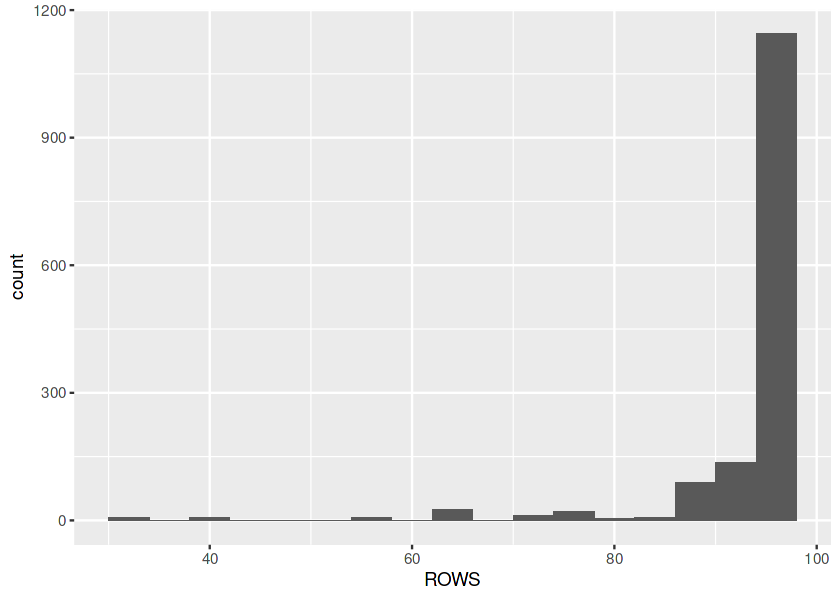

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5)
data_gen %>%
    group_by(PLANT, SOURCE_KEY, YEAR, MONTH, DAY) %>%
    summarize(ROWS = n()) %>%
    ggplot(aes(x = ROWS)) + 
    geom_histogram(binwidth = 4)

We have some days that has missing values on generation dataset. But, looking on the histogram, most days are complete!

Let's see this on wheather dataset.

`summarise()` has grouped output by 'PLANT', 'SOURCE_KEY', 'YEAR', 'MONTH'. You
can override using the `.groups` argument.


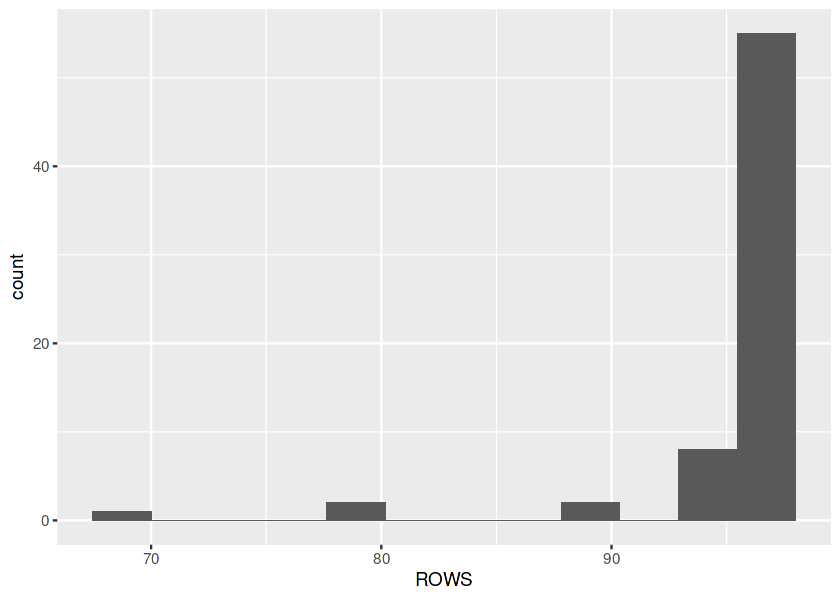

In [ ]:
# Checking b.
data_wthr %>%
    group_by(PLANT, SOURCE_KEY, YEAR, MONTH, DAY) %>%
    summarize(ROWS = n()) %>%
    ggplot(aes(x = ROWS)) + 
    geom_histogram(bins = 12)

Same as the generation data set.

## Answering the questions

I started trying to build my our impressions about the data, but it was overlapping the question proposed. Let's answer the questions than make another analyzes.

### 1. How many inverters are there for each plant?

In [ ]:
# Number of Inverters per Power Plant
data_gen %>%
    group_by(PLANT) %>%
    summarise(
        N_INVERTERS = n_distinct(SOURCE_KEY)
    )

PLANT   N_INVERTERS
1 Plant 1 22         
2 Plant 2 22

Not remarkable to say! Let's go then...

### 2. What is the mean value of daily yield?


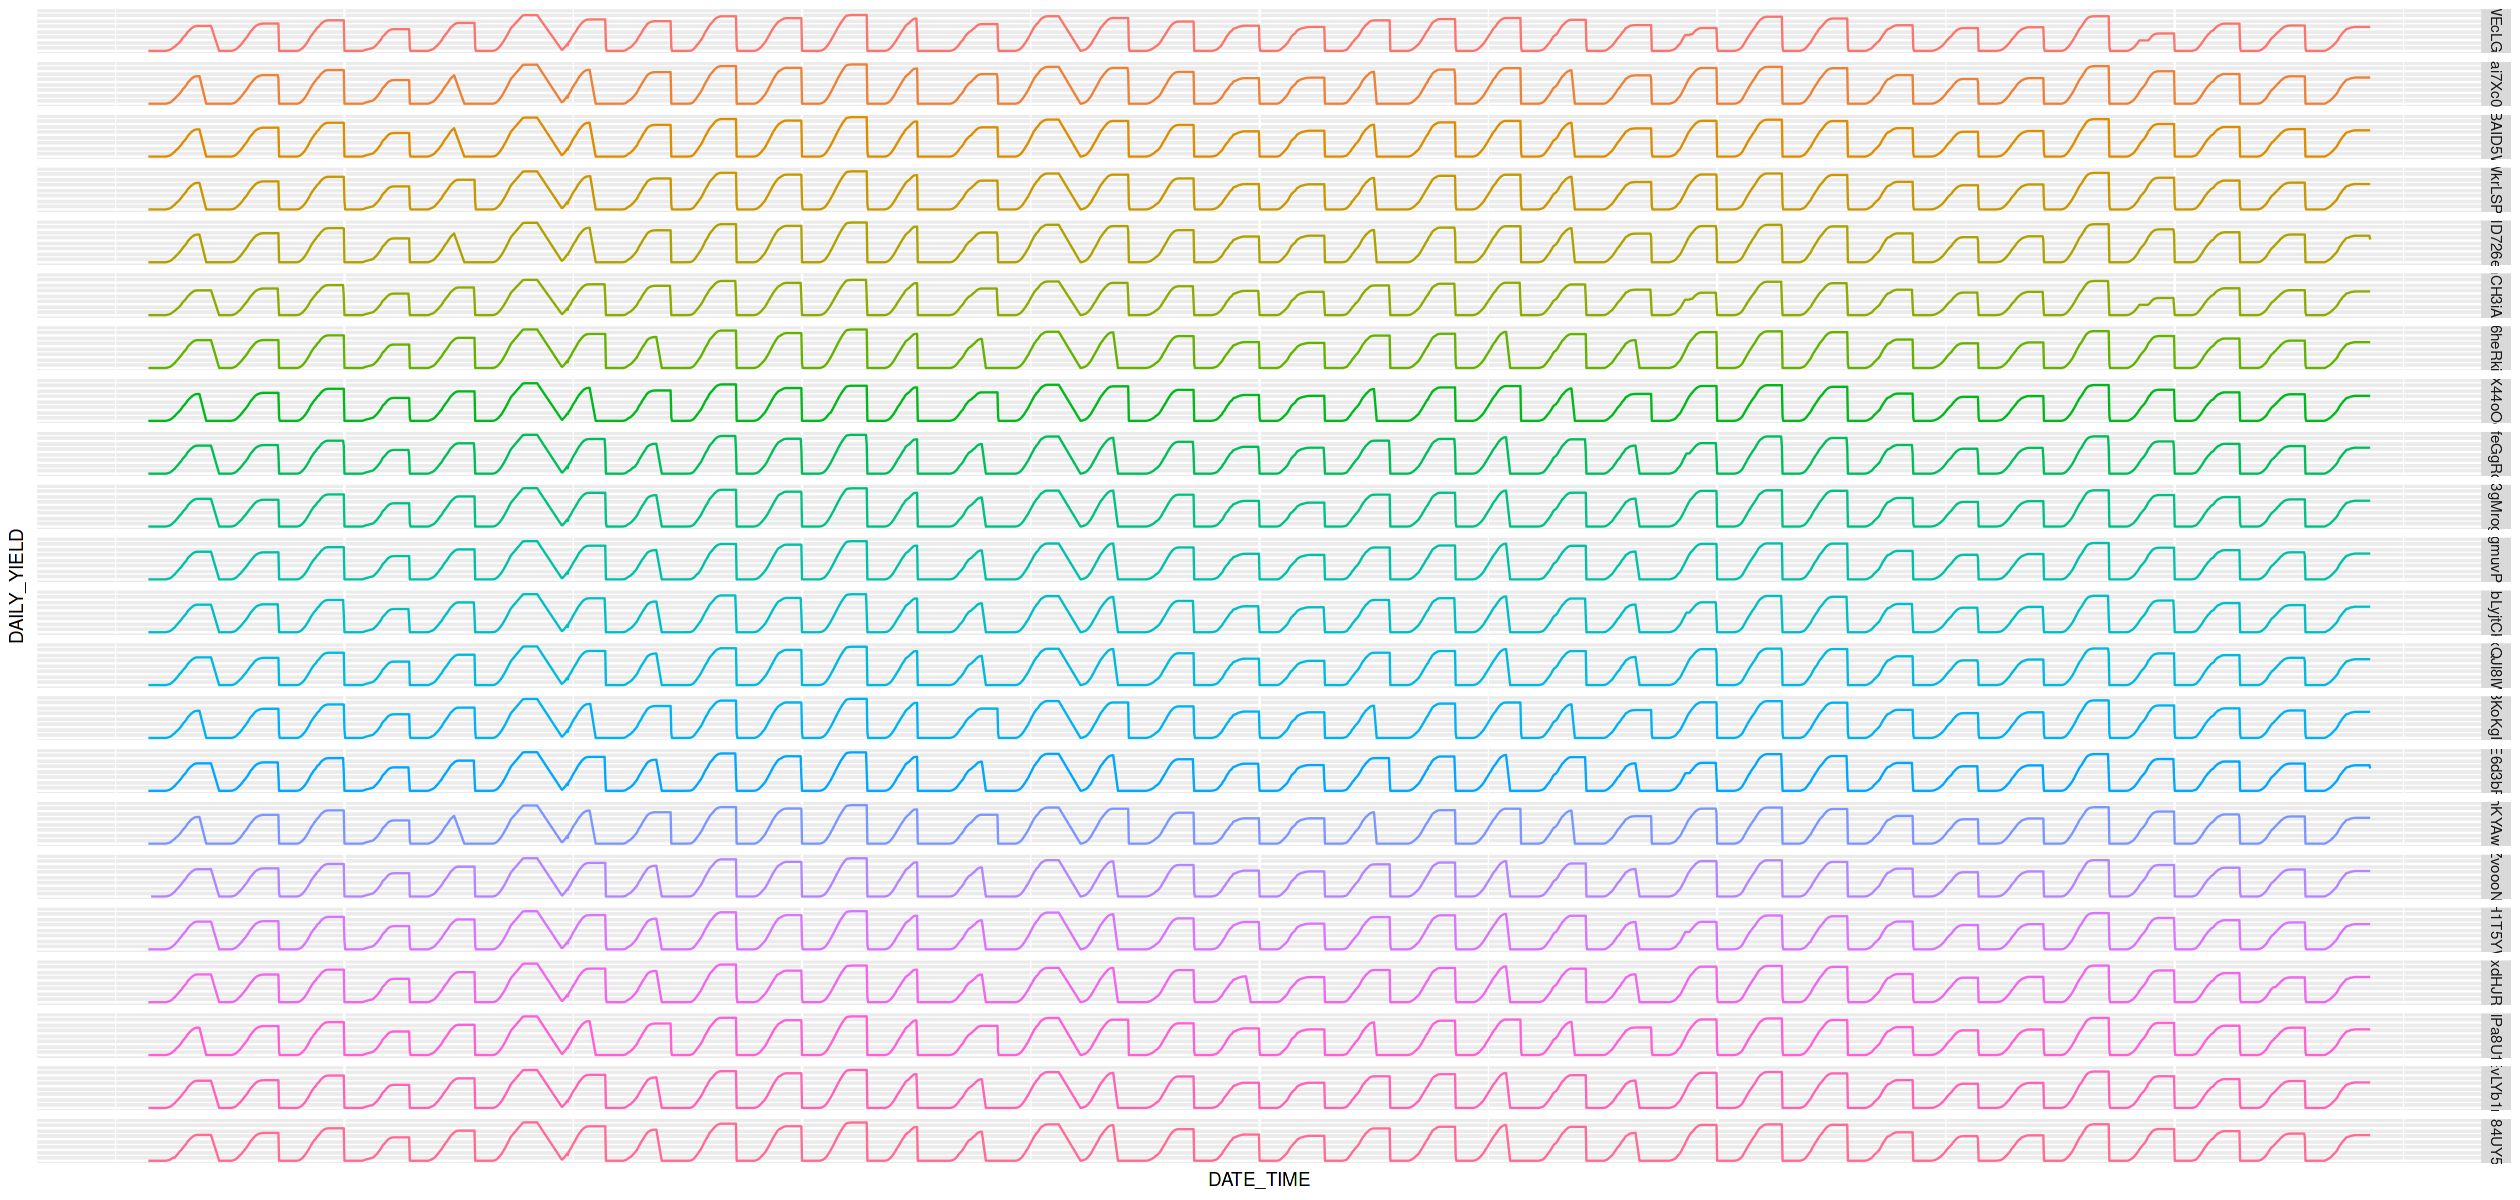

In [ ]:
# Analyzing DAILY_YIELD from Plant 1
options(repr.plot.width = 21, repr.plot.height = 10)
data_gen %>%
    filter(PLANT == "Plant 1") %>%
    ggplot(aes(x = DATE_TIME, y = DAILY_YIELD, color = SOURCE_KEY)) +
    geom_line() +
    facet_grid(SOURCE_KEY ~ .) + 
    theme(legend.position = "None",
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank() 
        )

For the Plant 1, every day have the same patern. Let's move to the Plant 2.

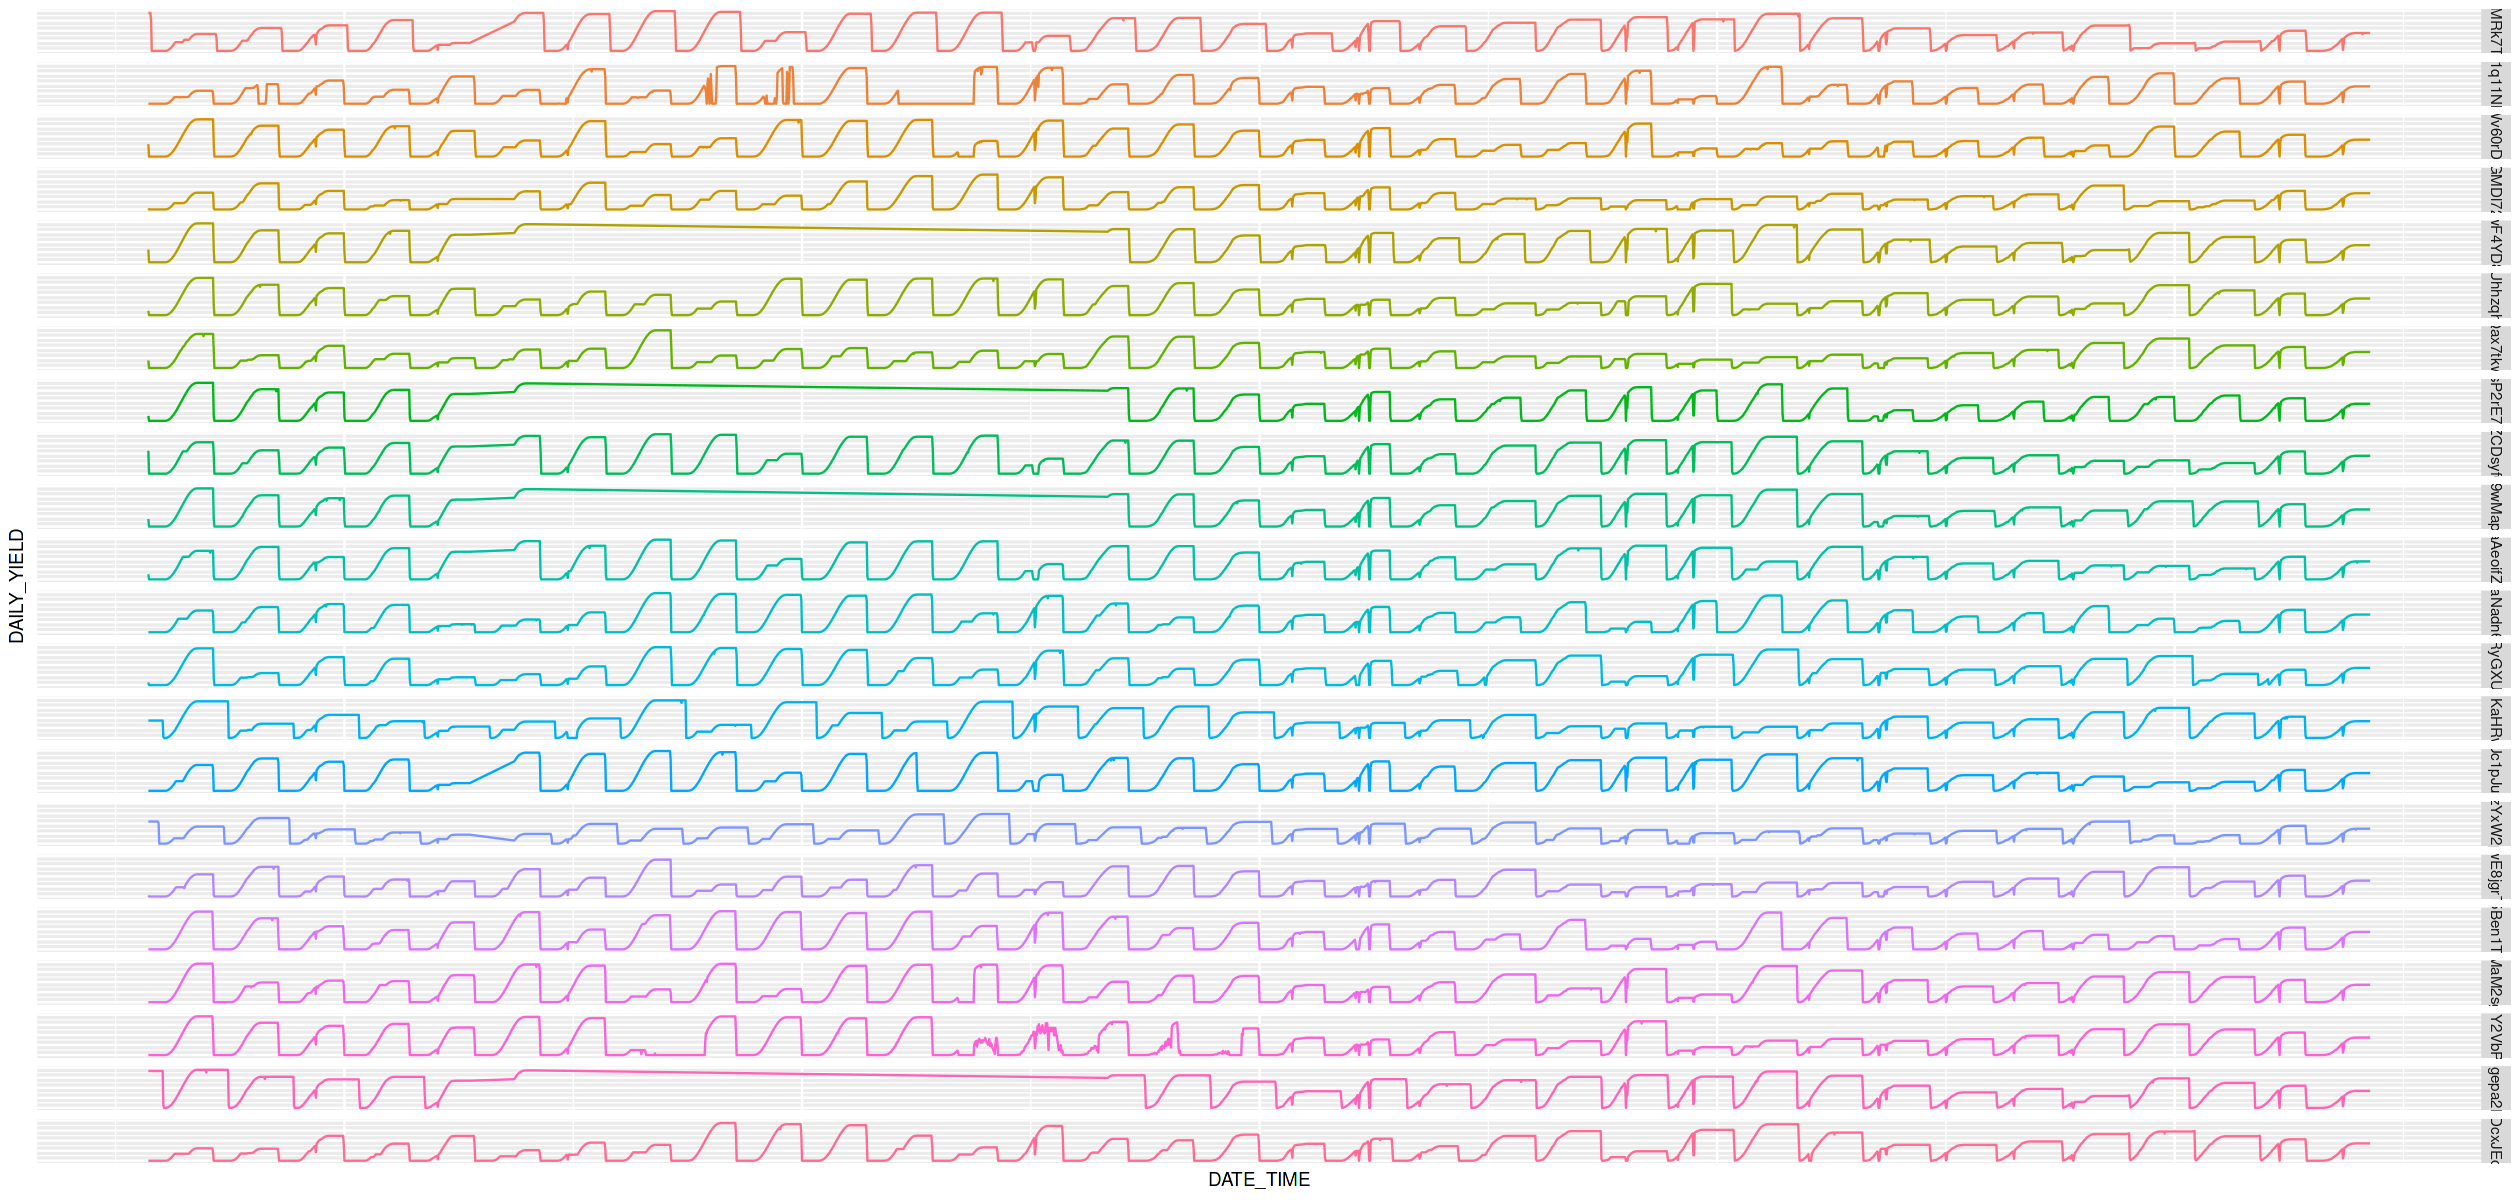

In [ ]:
# Analyzing DAILY_YIELD from Plant 2
data_gen %>%
    filter(PLANT == "Plant 2") %>%
    ggplot(aes(x = DATE_TIME, y = DAILY_YIELD, color = SOURCE_KEY)) +
    geom_line() +
    facet_grid(SOURCE_KEY ~ .) + 
    theme(legend.position = "None",
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank() 
        )

For the Plant 2, the days have diferent paterns and we need to deal with this avoinding this column or rebuing it. Let's understand first his concept from the Plant 1 data.

In [ ]:
# Analyzing the DAILY_YIELD
data_gen %>%
    filter(
        PLANT == "Plant 1",
        DAILY_YIELD > 0
    ) %>%
    arrange(
        SOURCE_KEY,
        DATE_TIME
    ) %>%
    head(5)

DATE_TIME           PLANT_ID SOURCE_KEY      DC_POWER  AC_POWER  DAILY_YIELD
1 2020-05-15 06:15:00 4135001  1BY6WEcLGh8j5v7  278.0000  26.86250   2.62500  
2 2020-05-15 06:30:00 4135001  1BY6WEcLGh8j5v7  626.5714  60.68571  13.28571  
3 2020-05-15 06:45:00 4135001  1BY6WEcLGh8j5v7 1224.7500 119.27500  34.87500  
4 2020-05-15 07:00:00 4135001  1BY6WEcLGh8j5v7 1734.5714 170.01429  72.71429  
5 2020-05-15 07:15:00 4135001  1BY6WEcLGh8j5v7 1856.3750 181.93750 116.25000  
  TOTAL_YIELD PLANT   DAY MONTH YEAR
1 6259562     Plant 1 15  5     2020
2 6259572     Plant 1 15  5     2020
3 6259594     Plant 1 15  5     2020
4 6259632     Plant 1 15  5     2020
5 6259675     Plant 1 15  5     2020

There are two details that we need to understand. First, there is a difference between DC and AC power that is a little odd. We know that happens some lost on power convertion. However, around 10 times is too much. It seems that DC_POWER is multiply by 10. Let's analyze Plant 2 information.

In [ ]:
# Analyzing the DC_POWER from Plant 2
data_gen %>%
    filter(
        PLANT == "Plant 2",
        DC_POWER > 0
    ) %>%
    group_by(
        SOURCE_KEY
    ) %>%
    top_n(1, DATE_TIME)

DATE_TIME           PLANT_ID SOURCE_KEY      DC_POWER AC_POWER DAILY_YIELD
1  2020-06-17 18:45:00 4136001  4UPUqMRk7TRMgml 3.614286 3.492857 4445.786   
2  2020-06-17 18:45:00 4136001  81aHJ1q11NBPMrL 3.606667 3.473333 4306.000   
3  2020-06-17 18:45:00 4136001  9kRcWv60rDACzjR 3.520000 3.400000 4196.867   
4  2020-06-17 18:45:00 4136001  Et9kgGMDl729KT4 3.414286 3.300000 4020.000   
5  2020-06-17 18:45:00 4136001  IQ2d7wF4YD8zU1Q 3.486667 3.360000 4251.000   
6  2020-06-17 18:45:00 4136001  LYwnQax7tkwH5Cb 2.914286 2.807143 3967.857   
7  2020-06-17 18:45:00 4136001  LlT2YUhhzqhg5Sw 3.642857 3.507143 4121.000   
8  2020-06-17 18:45:00 4136001  Mx2yZCDsyf6DPfv 3.600000 3.471429 4440.929   
9  2020-06-17 18:45:00 4136001  NgDl19wMapZy17u 3.613333 3.486667 4239.000   
10 2020-06-17 18:45:00 4136001  PeE6FRyGXUgsRhN 3.235714 3.121429 4258.000   
11 2020-06-17 18:45:00 4136001  Qf4GUc1pJu5T6c6 3.107143 2.992857 4397.714   
12 2020-06-17 18:45:00 4136001  Quc1TzYxW2pYoWX 2.650000 2.557143 3701.929   
13 2020-06-17 18:45:00 4136001  V94E5Ben1TlhnDV 3.007143 2.900000 4324.000   
14 2020-06-17 18:45:00 4136001  WcxssY2VbP4hApt 3.540000 3.420000 4330.467   
15 2020-06-17 18:45:00 4136001  mqwcsP2rE7J0TFp 3.666667 3.540000 4238.000   
16 2020-06-17 18:45:00 4136001  oZ35aAeoifZaQzV 3.550000 3.421429 4467.000   
17 2020-06-17 18:45:00 4136001  oZZkBaNadn6DNKz 3.714286 3.578571 4388.714   
18 2020-06-17 18:45:00 4136001  q49J1IKaHRwDQnt 3.771429 3.635714 4156.857   
19 2020-06-17 18:45:00 4136001  rrq4fwE8jgrTyWY 2.857143 2.757143 3930.714   
20 2020-06-17 18:45:00 4136001  vOuJvMaM2sgwLmb 3.780000 3.633333 4321.800   
21 2020-06-17 18:45:00 4136001  xMbIugepa2P7lBB 3.580000 3.453333 4217.733   
22 2020-06-17 18:45:00 4136001  xoJJ8DcxJEcupym 3.907143 3.757143 4315.643   
   TOTAL_YIELD  PLANT   DAY MONTH YEAR
1     2653494.8 Plant 2 17  6     2020
2  1215485799.0 Plant 2 17  6     2020
3  2247916294.9 Plant 2 17  6     2020
4     1854162.0 Plant 2 17  6     2020
5    20185065.0 Plant 2 17  6     2020
6  1795115879.9 Plant 2 17  6     2020
7   282788965.0 Plant 2 17  6     2020
8     2683350.9 Plant 2 17  6     2020
9   111745965.0 Plant 2 17  6     2020
10 1348549214.0 Plant 2 17  6     2020
11  838646675.7 Plant 2 17  6     2020
12  329645877.9 Plant 2 17  6     2020
13 1412292515.0 Plant 2 17  6     2020
14  181911917.5 Plant 2 17  6     2020
15  593815011.0 Plant 2 17  6     2020
16 1660188893.0 Plant 2 17  6     2020
17 1708287723.7 Plant 2 17  6     2020
18     520757.9 Plant 2 17  6     2020
19  121131355.7 Plant 2 17  6     2020
20    2427690.8 Plant 2 17  6     2020
21  106896393.7 Plant 2 17  6     2020
22  209335740.6 Plant 2 17  6     2020

Definitely, DC_POWER on Plant 1 is 10 times greater than usual. Let's fix this!

> Note: other situation that confirm our expectation is that, as we will see later on this notebook, irradiation on Plant 1 trend to be higher than on Plant 2.

In [ ]:
# Fixing DC_POWER for Plant 1
p1_gen <-
    p1_gen %>%
        mutate(DC_POWER = DC_POWER / 10)

data_gen <- union(p1_gen, p2_gen)

data_gen <- 
    data_gen %>%
        mutate(
            DAY = lubridate::day(DATE_TIME),
            MONTH = lubridate::month(DATE_TIME),
            YEAR = lubridate::year(DATE_TIME)
        )

Now I am little worried if we have another problems with the Generation Data. Let's see with we have some outliers on DC and AC generation.

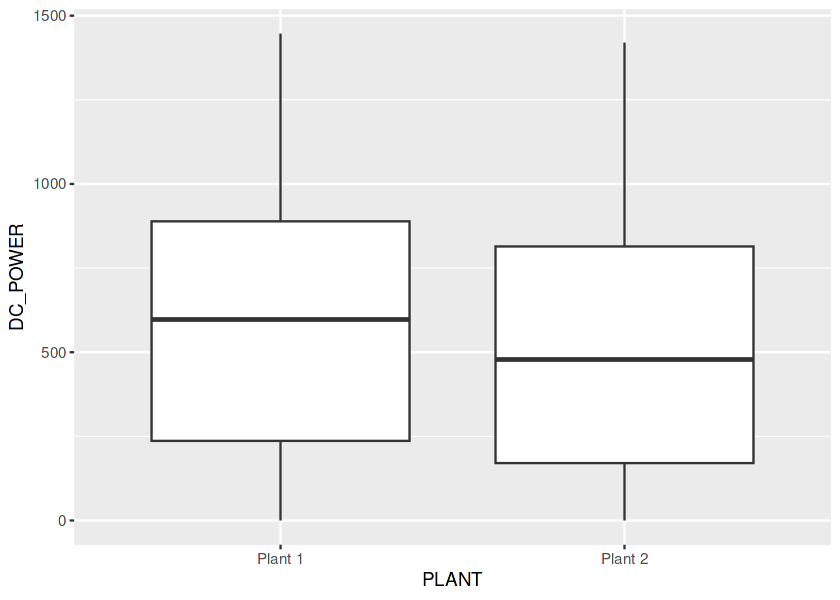

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5)
# Fingind Outliers - DC_POWER
data_gen %>%
    filter(DC_POWER != 0) %>%
    ggplot(aes(x = PLANT, y = DC_POWER)) +
    geom_boxplot()

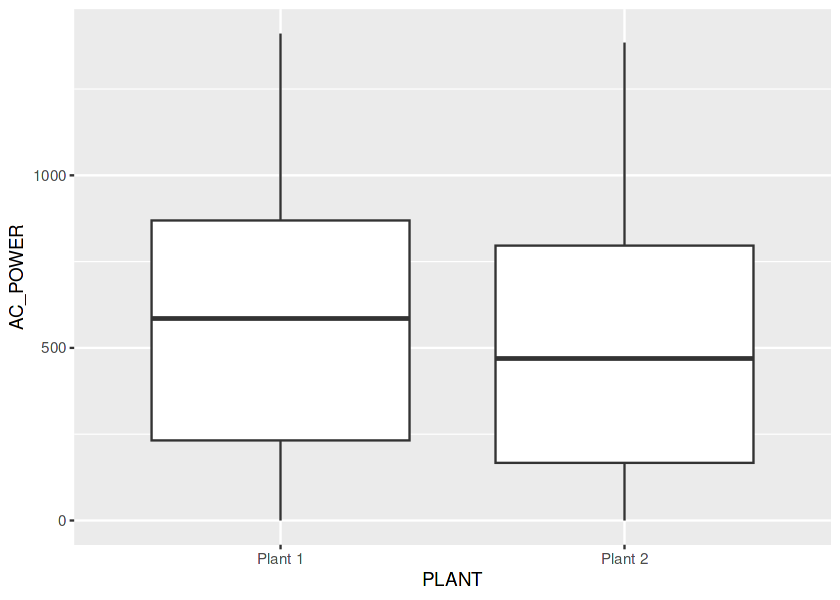

In [ ]:
# Fingind Outliers - AC_POWER
data_gen %>%
    filter(DC_POWER != 0) %>%
    ggplot(aes(x = PLANT, y = AC_POWER)) +
    geom_boxplot()

As we can see on our plots, DC_POWER and AC_POWER do not seem to have outliers. Let's dig now on DAILY_YIELD.

> Note: apply a transformation on the original data these two boxplots could be generated by a facet command.

Returning to DAILY_YIELD analyzes, does not seem correct too. It is important to say that power (kW) and power generated (kWh) could be a tricky. On this way, to transform power to power generated you need to know the timespan. On our case, you just need to multiply by 0.25, since 15min = 0.25h.

Retaking our question for this section, what is the mean value of daily yield?

In [ ]:
# Mean value of daily yield
data_gen %>%
    group_by(
        YEAR,
        MONTH,
        DAY
    ) %>%
    summarize(TOTAL_AC_POWER = sum(AC_POWER) * 0.25) %>%
    ungroup() %>%
    summarize(MEAN_DAILY_YIELD = mean(TOTAL_AC_POWER))

`summarise()` has grouped output by 'YEAR', 'MONTH'. You can override using the
`.groups` argument.


MEAN_DAILY_YIELD
1 275765.3

### 3. What is the total irradiation per day?



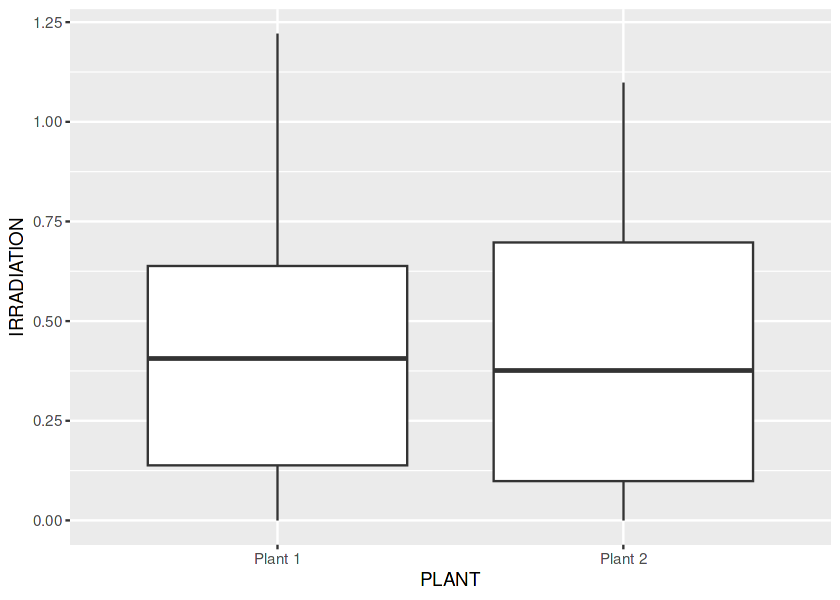

In [ ]:
# Analyzing Irradiation
data_wthr %>%
    filter(IRRADIATION != 0) %>%
    ggplot(aes(x = PLANT, y = IRRADIATION )) +
    geom_boxplot()

As we seen, we do not have outliers with irradiation. To calculate the irradiation per day, we first need to found the average between the two sensor, then sum each day. Other way is show data for each plant.

In [ ]:
# Irradiation per day
irdt_per_day <-
    data_wthr %>%
        group_by(DATE_TIME) %>%
        summarize(IRRADIATION_AVG = round(mean(IRRADIATION), 4)) %>%
        ungroup() %>%
        mutate(DATE = date(DATE_TIME)) %>%
        group_by(DATE) %>%
        summarize(IRRADIATION_TOTAL = sum(IRRADIATION_AVG))

"One image is worth a thousand words!"

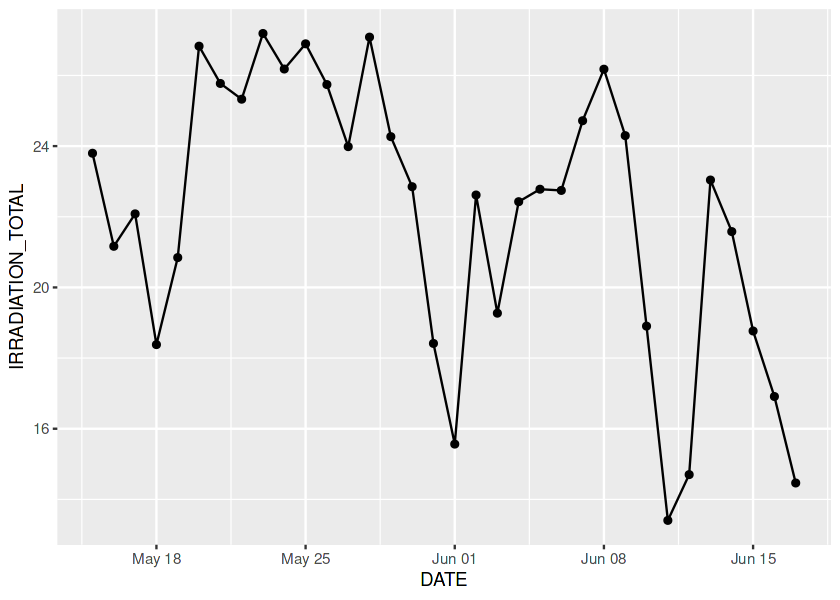

In [ ]:
# Irradiation plot
irdt_per_day %>%
    ggplot(aes(x = DATE, y = IRRADIATION_TOTAL)) +
    geom_line() +
    geom_point()

### 4. What is the max ambient and module temperature?

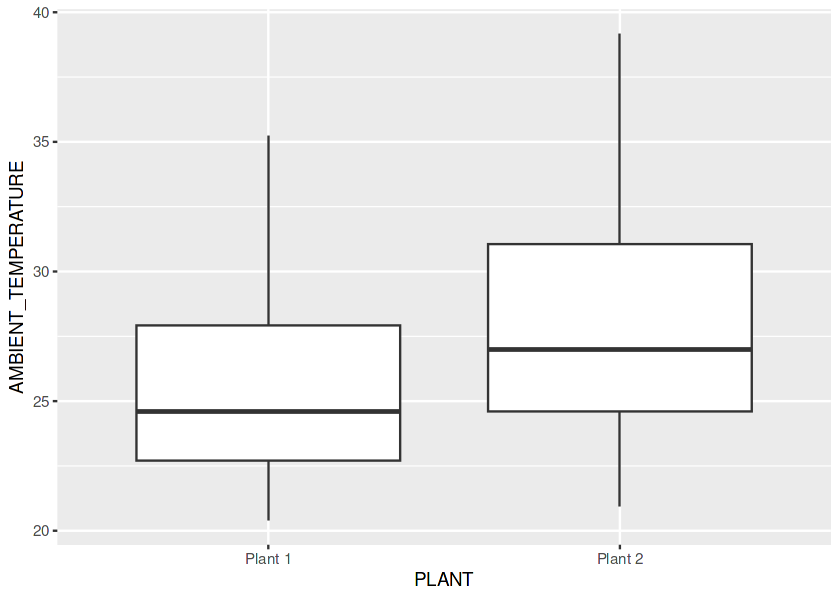

In [ ]:
# Analyzing the ambient temperature
data_wthr %>%
    ggplot(aes(x = PLANT, y = AMBIENT_TEMPERATURE )) +
    geom_boxplot()

For ambient temperature, the data is intact.

In [ ]:
# Ambient temperature
amb_temp_per_day <-
    data_wthr %>%
        summarize(
            MAX_AMB_TEMP = round(max(AMBIENT_TEMPERATURE),1),
            MEAN_AMB_TEMP = round(mean(AMBIENT_TEMPERATURE),1),
            MIN_AMB_TEMP = round(min(AMBIENT_TEMPERATURE),1),
        )

amb_temp_per_day

MAX_AMB_TEMP MEAN_AMB_TEMP MIN_AMB_TEMP
1 39.2         26.8          20.4

Now, let's dig more on module temperature.

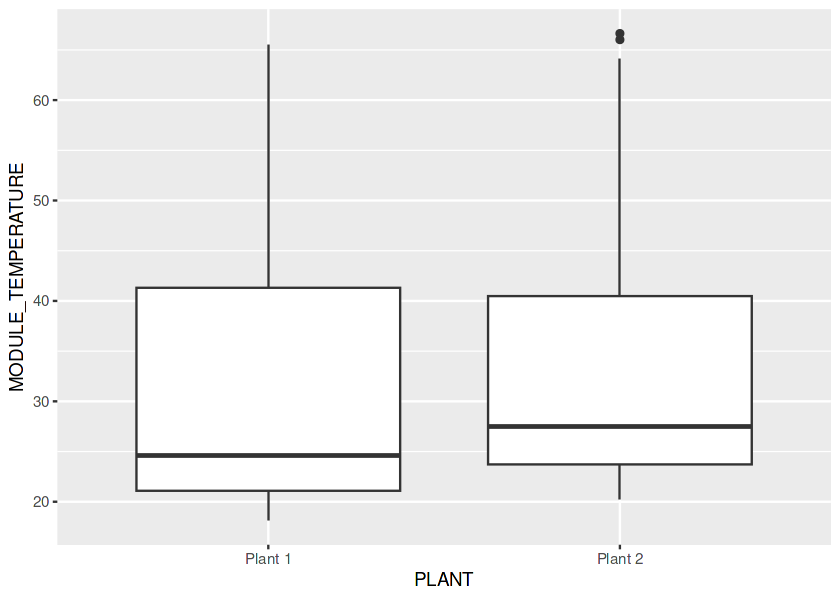

In [ ]:
# Analyzing the ambient temperature
data_wthr %>%
    ggplot(aes(x = PLANT, y = MODULE_TEMPERATURE )) +
    geom_boxplot()

It is better to go deep on module temperature from Plant 2.

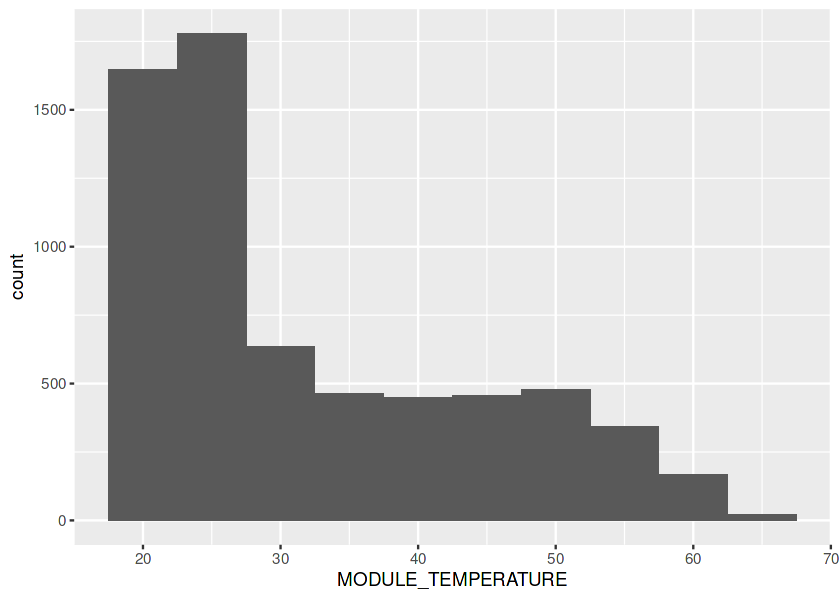

In [ ]:
# Plant 2 Module Temperature
data_wthr %>%
    ggplot(aes(x = MODULE_TEMPERATURE)) +
    geom_histogram(binwidth = 5)

Considering that temperature could reach more than 60oC, it is not possible to declare that this high temperatures are wrong. Let's main then on our dataset.

In [ ]:
# Module temperature
mod_temp_per_day <-
    data_wthr %>%
        group_by(PLANT) %>%
        summarize(MAX_MOD_TEMP = round(max(MODULE_TEMPERATURE ),1))

mod_temp_per_day

PLANT   MAX_MOD_TEMP
1 Plant 1 65.5        
2 Plant 2 66.6

### 5. What is the maximum/minimum amount of DC/AC Power generated in a time interval/day?

In [ ]:
# DC and AC Power
power_gen <-
    data_gen %>%
        group_by(PLANT, YEAR, MONTH, DAY) %>%
        summarize(
            TOT_DC_POWER = sum(DC_POWER) * 0.25,
            TOT_AC_POWER = sum(AC_POWER) * 0.25
        ) %>%
        ungroup()

# DC Power Maximun
power_gen %>%
    group_by(PLANT) %>%
    top_n(1, TOT_DC_POWER)

`summarise()` has grouped output by 'PLANT', 'YEAR', 'MONTH'. You can override
using the `.groups` argument.


PLANT   YEAR MONTH DAY TOT_DC_POWER TOT_AC_POWER
1 Plant 1 2020 5     25  197474.1     192894.0    
2 Plant 2 2020 5     15  166651.9     162859.4

In [ ]:
# DC Power Minimun
power_gen %>%
    group_by(PLANT) %>%
    top_n(1, desc(TOT_DC_POWER))

PLANT   YEAR MONTH DAY TOT_DC_POWER TOT_AC_POWER
1 Plant 1 2020 5     18  120313.71    117742.43   
2 Plant 2 2020 6     11   85688.21     83961.96

In [ ]:
# AC Power Maximun
power_gen %>%
    group_by(PLANT) %>%
    top_n(1, TOT_AC_POWER)

PLANT   YEAR MONTH DAY TOT_DC_POWER TOT_AC_POWER
1 Plant 1 2020 5     25  197474.1     192894.0    
2 Plant 2 2020 5     15  166651.9     162859.4

In [ ]:
# AC Power Minimun
power_gen %>%
    group_by(PLANT) %>%
    top_n(1, desc(TOT_AC_POWER))

PLANT   YEAR MONTH DAY TOT_DC_POWER TOT_AC_POWER
1 Plant 1 2020 5     18  120313.71    117742.43   
2 Plant 2 2020 6     11   85688.21     83961.96

### 6. Which inverter (source_key) has produced maximum DC/AC power?

In [ ]:
# DC and AC Power
power_gen_inverter <-
    data_gen %>%
        group_by(PLANT, SOURCE_KEY, YEAR, MONTH, DAY) %>%
        summarize(
            TOT_DC_POWER = sum(DC_POWER) * 0.25,
            TOT_AC_POWER = sum(AC_POWER) * 0.25
        ) %>%
        ungroup()

# DC Power Maximun
power_gen_inverter %>%
    group_by(PLANT) %>%
    top_n(1, TOT_DC_POWER)

`summarise()` has grouped output by 'PLANT', 'SOURCE_KEY', 'YEAR', 'MONTH'. You
can override using the `.groups` argument.


PLANT   SOURCE_KEY      YEAR MONTH DAY TOT_DC_POWER TOT_AC_POWER
1 Plant 1 adLQvlD726eNBSB 2020 5     25   9394.945    9174.685    
2 Plant 2 Qf4GUc1pJu5T6c6 2020 5     22  10111.552    9875.882

In [ ]:
# DC Power Minimun
power_gen_inverter %>%
    group_by(PLANT) %>%
    top_n(1, desc(TOT_DC_POWER))

PLANT   SOURCE_KEY      YEAR MONTH DAY TOT_DC_POWER TOT_AC_POWER
1 Plant 1 bvBOhCH3iADSZry 2020 6     14  4060.4076    3979.0911   
2 Plant 2 mqwcsP2rE7J0TFp 2020 5     29   744.0598     729.1529

In [ ]:
# AC Power Maximun
power_gen_inverter %>%
    group_by(PLANT) %>%
    top_n(1, TOT_AC_POWER)

PLANT   SOURCE_KEY      YEAR MONTH DAY TOT_DC_POWER TOT_AC_POWER
1 Plant 1 adLQvlD726eNBSB 2020 5     25   9394.945    9174.685    
2 Plant 2 Qf4GUc1pJu5T6c6 2020 5     22  10111.552    9875.882

In [ ]:
# AC Power Minimun
power_gen_inverter %>%
    group_by(PLANT) %>%
    top_n(1, desc(TOT_AC_POWER))

PLANT   SOURCE_KEY      YEAR MONTH DAY TOT_DC_POWER TOT_AC_POWER
1 Plant 1 bvBOhCH3iADSZry 2020 6     14  4060.4076    3979.0911   
2 Plant 2 mqwcsP2rE7J0TFp 2020 5     29   744.0598     729.1529

> Note: I prefer to show data per topic because when could see the date when that situation happens.

### 7. Rank the inverters based on the DC/AC power they produce

In [ ]:
# DC and AC Power
power_gen_inverter_total <-
    data_gen %>%
        group_by(PLANT, SOURCE_KEY) %>%
        summarize(
            TOT_DC_POWER = sum(DC_POWER) * 0.25,
            TOT_AC_POWER = sum(AC_POWER) * 0.25
        ) %>%
        arrange(
            PLANT,
            SOURCE_KEY,
            desc(TOT_DC_POWER),
            desc(TOT_AC_POWER)
        )

power_gen_inverter_total

`summarise()` has grouped output by 'PLANT'. You can override using the
`.groups` argument.


PLANT   SOURCE_KEY      TOT_DC_POWER TOT_AC_POWER
1  Plant 1 1BY6WEcLGh8j5v7 226592.9     221666.3    
2  Plant 1 1IF53ai7Xc0U56Y 251573.6     246001.8    
3  Plant 1 3PZuoBAID5Wc2HD 251078.2     245517.1    
4  Plant 1 7JYdWkrLSPkdwr4 245383.8     239976.6    
5  Plant 1 McdE0feGgRqW7Ca 250803.1     245270.2    
6  Plant 1 VHMLBKoKgIrUVDU 251431.3     245862.3    
7  Plant 1 WRmjgnKYAwPKWDb 245962.2     240534.6    
8  Plant 1 YxYtjZvoooNbGkE 246728.6     241281.9    
9  Plant 1 ZnxXDlPa8U1GXgE 249935.1     244411.1    
10 Plant 1 ZoEaEvLYb1n2sOq 245078.2     239675.1    
11 Plant 1 adLQvlD726eNBSB 254944.5     249281.3    
12 Plant 1 bvBOhCH3iADSZry 223137.2     218309.4    
13 Plant 1 iCRJl6heRkivqQ3 249693.3     244172.1    
14 Plant 1 ih0vzX44oOqAx2f 242396.1     237068.1    
15 Plant 1 pkci93gMrogZuBj 247390.6     241929.9    
16 Plant 1 rGa61gmuvPhdLxV 247049.1     241599.0    
17 Plant 1 sjndEbLyjtCKgGv 245879.9     240479.5    
18 Plant 1 uHbuxQJl8lW7ozc 249634.1     244115.5    
19 Plant 1 wCURE6d3bPkepu2 247790.6     242315.1    
20 Plant 1 z9Y9gH1T5YWrNuG 244925.0     239523.5    
21 Plant 1 zBIq5rxdHJRwDNY 245511.3     240104.8    
22 Plant 1 zVJPv84UY57bAof 248923.2     243419.5    
23 Plant 2 4UPUqMRk7TRMgml 221861.2     216922.0    
24 Plant 2 81aHJ1q11NBPMrL 188041.3     183912.2    
25 Plant 2 9kRcWv60rDACzjR 199331.1     194954.8    
26 Plant 2 Et9kgGMDl729KT4 150349.0     147153.9    
27 Plant 2 IQ2d7wF4YD8zU1Q 168102.9     164373.1    
28 Plant 2 LYwnQax7tkwH5Cb 159924.1     156505.7    
29 Plant 2 LlT2YUhhzqhg5Sw 200015.7     195630.4    
30 Plant 2 Mx2yZCDsyf6DPfv 227654.3     222579.3    
31 Plant 2 NgDl19wMapZy17u 161036.1     157481.9    
32 Plant 2 PeE6FRyGXUgsRhN 202619.7     198166.2    
33 Plant 2 Qf4GUc1pJu5T6c6 222649.1     217688.9    
34 Plant 2 Quc1TzYxW2pYoWX 138387.2     135503.7    
35 Plant 2 V94E5Ben1TlhnDV 213593.9     208860.9    
36 Plant 2 WcxssY2VbP4hApt 199837.6     195402.1    
37 Plant 2 mqwcsP2rE7J0TFp 162319.2     158736.2    
38 Plant 2 oZ35aAeoifZaQzV 221288.0     216358.9    
39 Plant 2 oZZkBaNadn6DNKz 208511.7     203909.5    
40 Plant 2 q49J1IKaHRwDQnt 184265.5     180265.2    
41 Plant 2 rrq4fwE8jgrTyWY 170411.8     166750.6    
42 Plant 2 vOuJvMaM2sgwLmb 213543.2     208753.0    
43 Plant 2 xMbIugepa2P7lBB 165269.5     161614.7    
44 Plant 2 xoJJ8DcxJEcupym 196295.2     191983.2

### 8. Is there any missing data?

As we speak first, there are some missing data.

# Visualization and further exploration

On this section, our goal is employ different visualization techniques to understand the data and underlying patterns.

In [ ]:
# Have we inconsistency between DC_POWER and AC_POWER?
data_gen %>%
    filter(
        DC_POWER != 0 & AC_POWER == 0,
        DC_POWER == 0 & AC_POWER != 0) %>%
    count() %>%
    pull() != 0

[1] FALSE

In [ ]:
# Joining generation and wether data
data_gen %>%
    full_join(
        data_wthr,
        by = c("DATE_TIME", "PLANT_ID")
    ) %>%
    select(DATE_TIME:AC_POWER, SOURCE_KEY.y:IRRADIATION) %>%
    rename(
        SOURCE_KEY_INV = SOURCE_KEY.x,
        SOURCE_KEY_SNR = SOURCE_KEY.y 
    ) ->
        data_gen_wthr

> NOTE: Efficiency could be calculated by summing generation and then dividing or by diving and them taking the avarage.

In [ ]:
# Summarizing generation and wether data
summary(data_gen_wthr)

   DATE_TIME                      PLANT_ID       SOURCE_KEY_INV    
 Min.   :2020-05-15 00:00:00   Min.   :4135001   Length:136501     
 1st Qu.:2020-05-23 23:00:00   1st Qu.:4135001   Class :character  
 Median :2020-06-01 18:30:00   Median :4135001   Mode  :character  
 Mean   :2020-06-01 09:21:52   Mean   :4135497                     
 3rd Qu.:2020-06-09 21:45:00   3rd Qu.:4136001                     
 Max.   :2020-06-17 23:45:00   Max.   :4136001                     
                                                                   
    DC_POWER           AC_POWER        SOURCE_KEY_SNR     AMBIENT_TEMPERATURE
 Min.   :   0.000   Min.   :   0.000   Length:136501      Min.   :20.40      
 1st Qu.:   0.000   1st Qu.:   0.000   Class :character   1st Qu.:23.63      
 Median :   3.638   Median :   3.507   Mode  :character   Median :25.91      
 Mean   : 280.991   Mean   : 274.803                      Mean   :26.76      
 3rd Qu.: 543.462   3rd Qu.: 532.673                      3rd Qu.:

The summary of **data_gen_wthr** shows that there are some missing data when we join the two datasets.
Let's start with DC_POWER and AC_POWER columns.

In [ ]:
data_gen_wthr %>%
    filter(is.na(DC_POWER))

DATE_TIME           PLANT_ID SOURCE_KEY_INV DC_POWER AC_POWER
1  2020-05-20 23:00:00 4135001  NA             NA       NA      
2  2020-05-20 23:15:00 4135001  NA             NA       NA      
3  2020-05-20 23:30:00 4135001  NA             NA       NA      
4  2020-05-20 23:45:00 4135001  NA             NA       NA      
5  2020-05-21 00:00:00 4135001  NA             NA       NA      
6  2020-05-21 00:15:00 4135001  NA             NA       NA      
7  2020-05-21 00:30:00 4135001  NA             NA       NA      
8  2020-05-23 05:15:00 4135001  NA             NA       NA      
9  2020-05-25 05:45:00 4135001  NA             NA       NA      
10 2020-05-28 22:30:00 4135001  NA             NA       NA      
11 2020-05-28 22:45:00 4135001  NA             NA       NA      
12 2020-05-28 23:00:00 4135001  NA             NA       NA      
13 2020-05-28 23:15:00 4135001  NA             NA       NA      
14 2020-05-28 23:30:00 4135001  NA             NA       NA      
15 2020-05-28 23:45:00 4135001  NA             NA       NA      
16 2020-05-29 00:00:00 4135001  NA             NA       NA      
17 2020-05-29 00:15:00 4135001  NA             NA       NA      
18 2020-05-29 00:30:00 4135001  NA             NA       NA      
19 2020-05-29 00:45:00 4135001  NA             NA       NA      
20 2020-05-29 01:00:00 4135001  NA             NA       NA      
21 2020-05-29 01:15:00 4135001  NA             NA       NA      
22 2020-05-29 01:30:00 4135001  NA             NA       NA      
23 2020-05-29 01:45:00 4135001  NA             NA       NA      
24 2020-06-17 06:15:00 4135001  NA             NA       NA      
25 2020-06-17 06:30:00 4135001  NA             NA       NA      
   SOURCE_KEY_SNR  AMBIENT_TEMPERATURE MODULE_TEMPERATURE IRRADIATION
1  HmiyD2TTLFNqkNe 23.83085            21.02412           0.00000000 
2  HmiyD2TTLFNqkNe 23.70116            20.78640           0.00000000 
3  HmiyD2TTLFNqkNe 23.58963            20.57288           0.00000000 
4  HmiyD2TTLFNqkNe 23.56901            20.62210           0.00000000 
5  HmiyD2TTLFNqkNe 23.49738            20.58414           0.00000000 
6  HmiyD2TTLFNqkNe 23.22894            20.23035           0.00000000 
7  HmiyD2TTLFNqkNe 23.20452            20.17994           0.00000000 
8  HmiyD2TTLFNqkNe 21.90002            20.99499           0.00000000 
9  HmiyD2TTLFNqkNe 22.93050            21.10439           0.00190756 
10 HmiyD2TTLFNqkNe 21.25922            20.27704           0.00000000 
11 HmiyD2TTLFNqkNe 21.24207            20.33068           0.00000000 
12 HmiyD2TTLFNqkNe 21.21269            20.33963           0.00000000 
13 HmiyD2TTLFNqkNe 21.19580            20.36387           0.00000000 
14 HmiyD2TTLFNqkNe 21.19909            20.35207           0.00000000 
15 HmiyD2TTLFNqkNe 21.15724            20.26705           0.00000000 
16 HmiyD2TTLFNqkNe 21.09544            20.23661           0.00000000 
17 HmiyD2TTLFNqkNe 21.07619            20.20665           0.00000000 
18 HmiyD2TTLFNqkNe 21.00892            20.19078           0.00000000 
19 HmiyD2TTLFNqkNe 20.79403            19.97320           0.00000000 
20 HmiyD2TTLFNqkNe 20.70874            19.86687           0.00000000 
21 HmiyD2TTLFNqkNe 20.66671            19.79450           0.00000000 
22 HmiyD2TTLFNqkNe 20.69516            19.81048           0.00000000 
23 HmiyD2TTLFNqkNe 20.70714            19.79929           0.00000000 
24 HmiyD2TTLFNqkNe 22.09340            20.82298           0.01917505 
25 HmiyD2TTLFNqkNe 22.27563            21.97357           0.03462409

Well, some rows the irradiation is zero, then the generation should be zero too.
Before o clean this, let's see the second case: DC or AC POWER are NA and IRRADATION is greater than 0

In [ ]:
data_gen_wthr %>%
    filter(is.na(DC_POWER) & IRRADIATION !=0)

DATE_TIME           PLANT_ID SOURCE_KEY_INV DC_POWER AC_POWER SOURCE_KEY_SNR 
1 2020-05-25 05:45:00 4135001  NA             NA       NA       HmiyD2TTLFNqkNe
2 2020-06-17 06:15:00 4135001  NA             NA       NA       HmiyD2TTLFNqkNe
3 2020-06-17 06:30:00 4135001  NA             NA       NA       HmiyD2TTLFNqkNe
  AMBIENT_TEMPERATURE MODULE_TEMPERATURE IRRADIATION
1 22.93050            21.10439           0.00190756 
2 22.09340            20.82298           0.01917505 
3 22.27563            21.97357           0.03462409

Well, early in the morning with a small irratiation, generation could be zero too.
Let's apply these rules on our dataset

In [ ]:
data_gen_wthr %>%
    mutate(
        DC_POWER = ifelse(is.na(DC_POWER), 0, DC_POWER),
        AC_POWER = ifelse(is.na(AC_POWER), 0, AC_POWER)
    ) ->
    data_gen_wthr

Now, let's see the weather columns.

In [ ]:
data_gen_wthr %>%
    filter(is.na(AMBIENT_TEMPERATURE))

DATE_TIME           PLANT_ID SOURCE_KEY_INV  DC_POWER AC_POWER SOURCE_KEY_SNR
1 2020-06-03 14:00:00 4135001  1IF53ai7Xc0U56Y 700.3    685.8    NA            
2 2020-06-03 14:00:00 4135001  adLQvlD726eNBSB 720.4    705.4    NA            
3 2020-06-03 14:00:00 4135001  wCURE6d3bPkepu2 754.5    738.7    NA            
4 2020-06-03 14:00:00 4135001  z9Y9gH1T5YWrNuG 794.6    777.8    NA            
  AMBIENT_TEMPERATURE MODULE_TEMPERATURE IRRADIATION
1 NA                  NA                 NA         
2 NA                  NA                 NA         
3 NA                  NA                 NA         
4 NA                  NA                 NA

Well, only fill the NAs with the previous information on same column.

In [ ]:
data_gen_wthr <- 
    data_gen_wthr %>%
        fill(AMBIENT_TEMPERATURE:IRRADIATION)

Let's apply some transformation on DATE_TIME

In [ ]:
data_gen_wthr <-    
    data_gen_wthr %>%
        mutate(
            WEEK = week(DATE_TIME),
            DATE = date(DATE_TIME),
            HOUR = hour(DATE_TIME)
        )

Making aggregation easier.

In [ ]:
data_group <- function(group_var) {
    data_gen_wthr %>%
        group_by(PLANT_ID, across({{ group_var }})) %>%
        summarize(
            DC_POWER_TOT = sum(DC_POWER),
            AC_POWER_TOT = sum(AC_POWER),
            AMBIENT_TEMPERATURE_TOT = mean(AMBIENT_TEMPERATURE),
            MODULE_TEMPERATURE_TOT = mean(MODULE_TEMPERATURE),
            IRRADIATION_TOT = sum(IRRADIATION)
        )
}

`summarise()` has grouped output by 'PLANT_ID'. You can override using the
`.groups` argument.


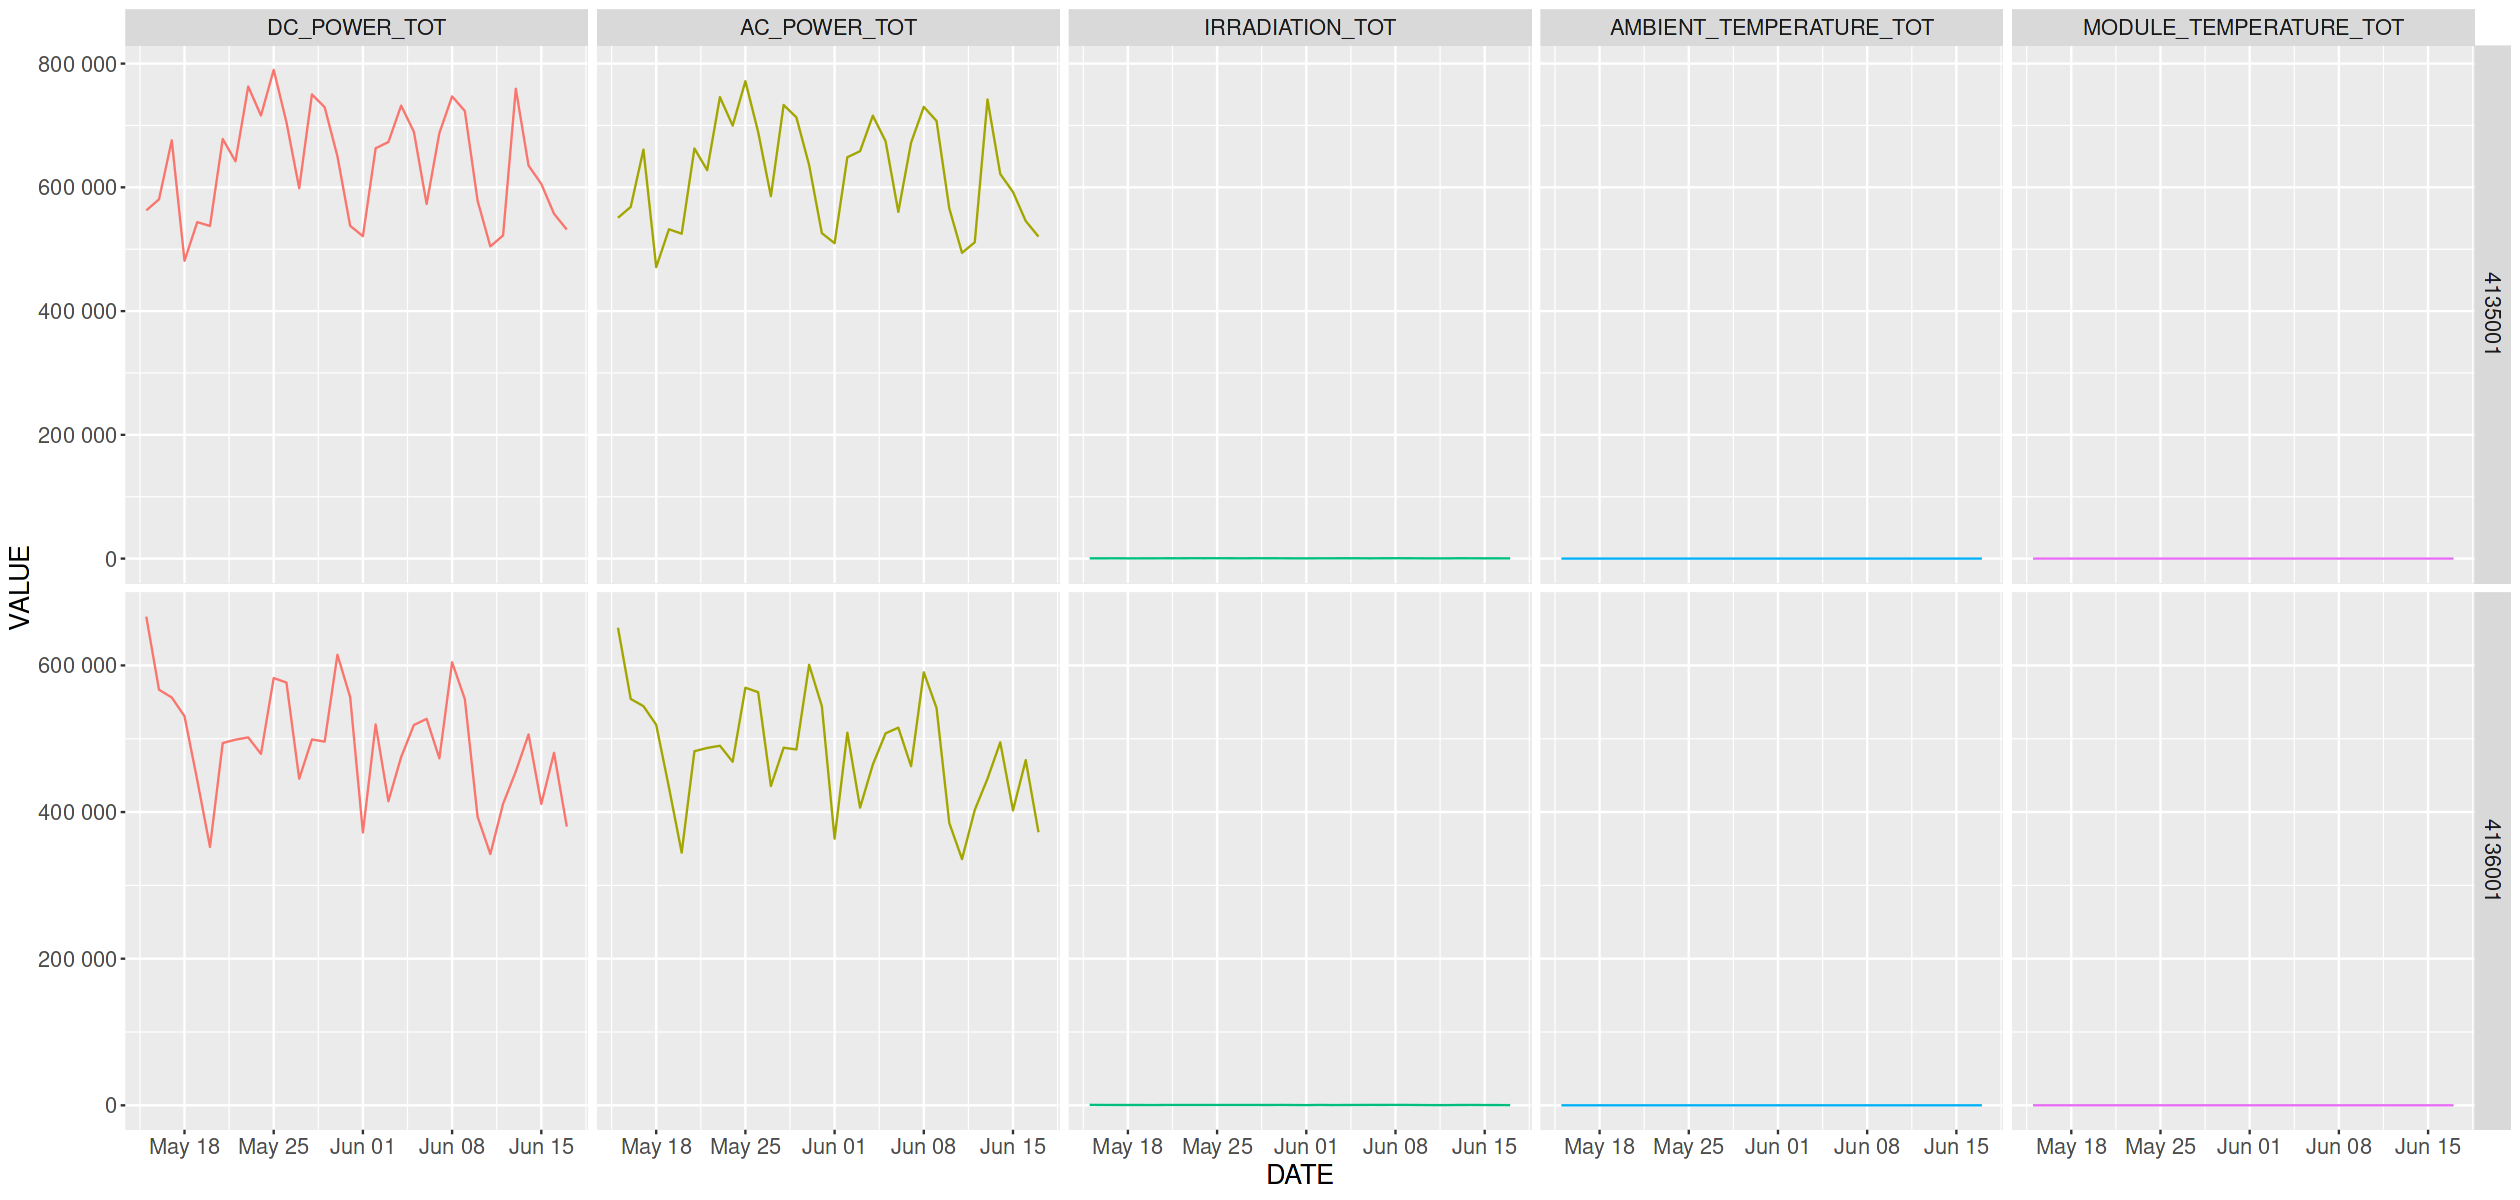

In [ ]:
options(repr.plot.width = 21, repr.plot.height = 10)

# Creating the dataset
data_day <-
    data_group(c(DATE)) %>%
        pivot_longer(DC_POWER_TOT:IRRADIATION_TOT, names_to = "VAR", values_to = "VALUE")

# Arranging
data_day$VAR = fct_relevel(data_day$VAR,
    c("DC_POWER_TOT",
    "AC_POWER_TOT",
    "IRRADIATION_TOT",
    "AMBIENT_TEMPERATURE_TOT",
    "MODULE_TEMPERATURE_TOT"))

# Generation and Radiation Plot - BAD
data_day %>%
    ggplot(aes(x = DATE, y = VALUE, color = VAR)) +
    geom_line() +
    scale_y_continuous(labels = label_number_auto()) +
    facet_grid(PLANT_ID ~ VAR, scales = "free_y") +
    theme(legend.position = "None", text = element_text(size = 16))

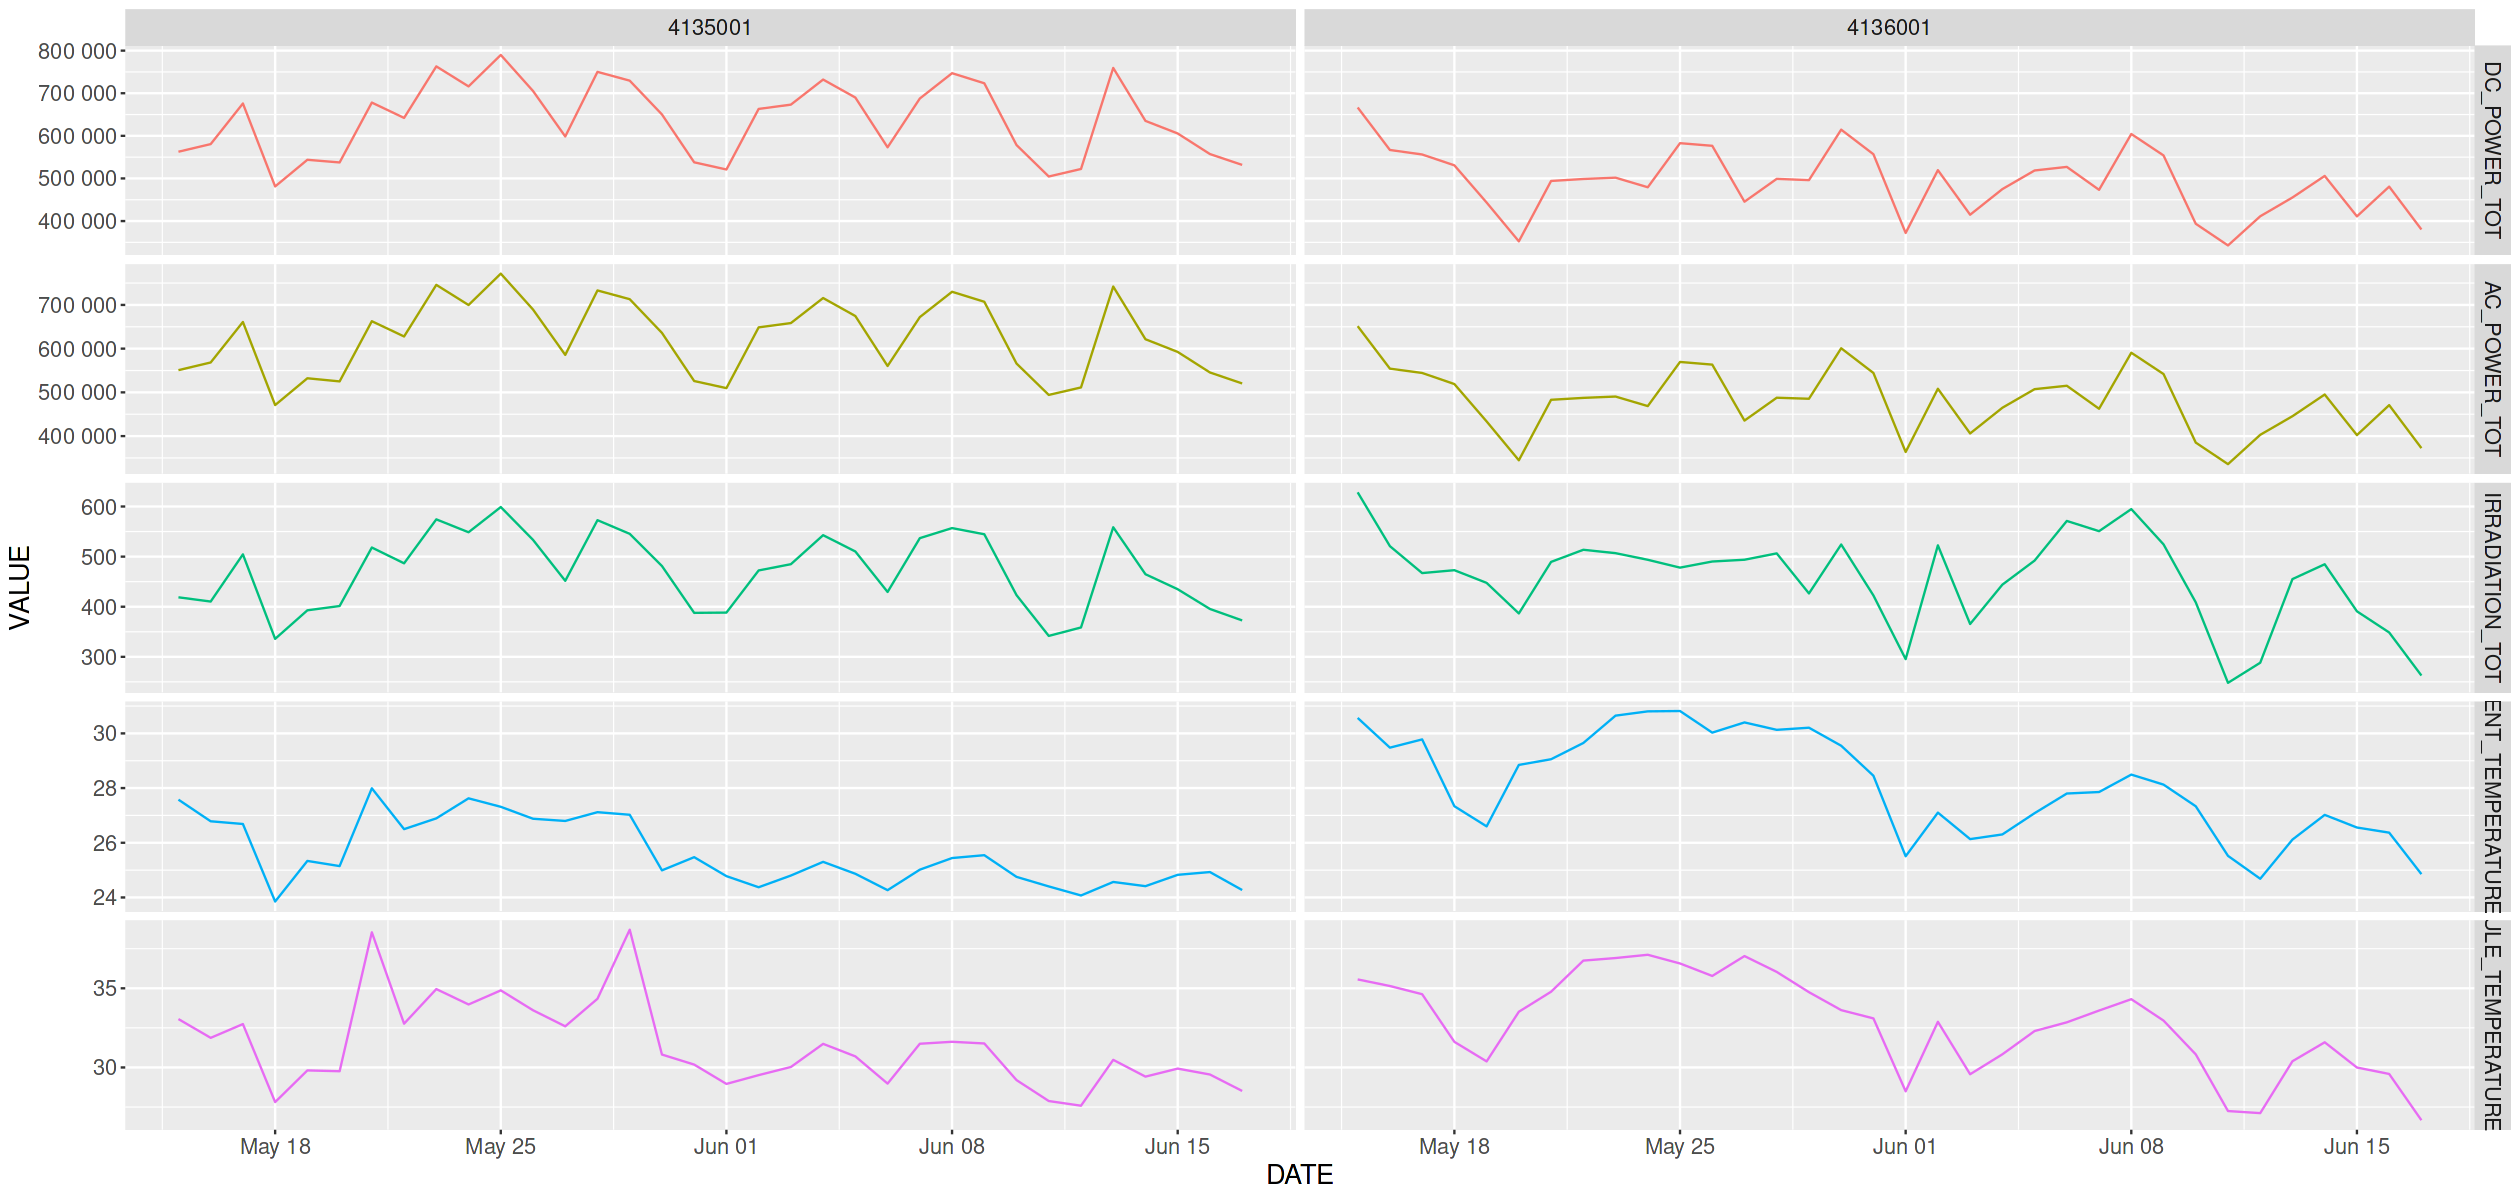

In [ ]:
# Generation and Radiation Plot - NOT TOO GOOD
data_day %>%
    ggplot(aes(x = DATE, y = VALUE, color = VAR)) +
    geom_line() +
    scale_y_continuous(labels = label_number_auto()) +
    facet_grid(VAR ~ PLANT_ID, scales = "free_y") +
    theme(legend.position = "None", text = element_text(size = 16))

It is interesting to say that our variables on plant aggregation are very correlated. We will explore this forward.
On last plots, we visualize how our variables changes when time goes, but maybe there is patterners on the days.

`summarise()` has grouped output by 'PLANT_ID'. You can override using the
`.groups` argument.


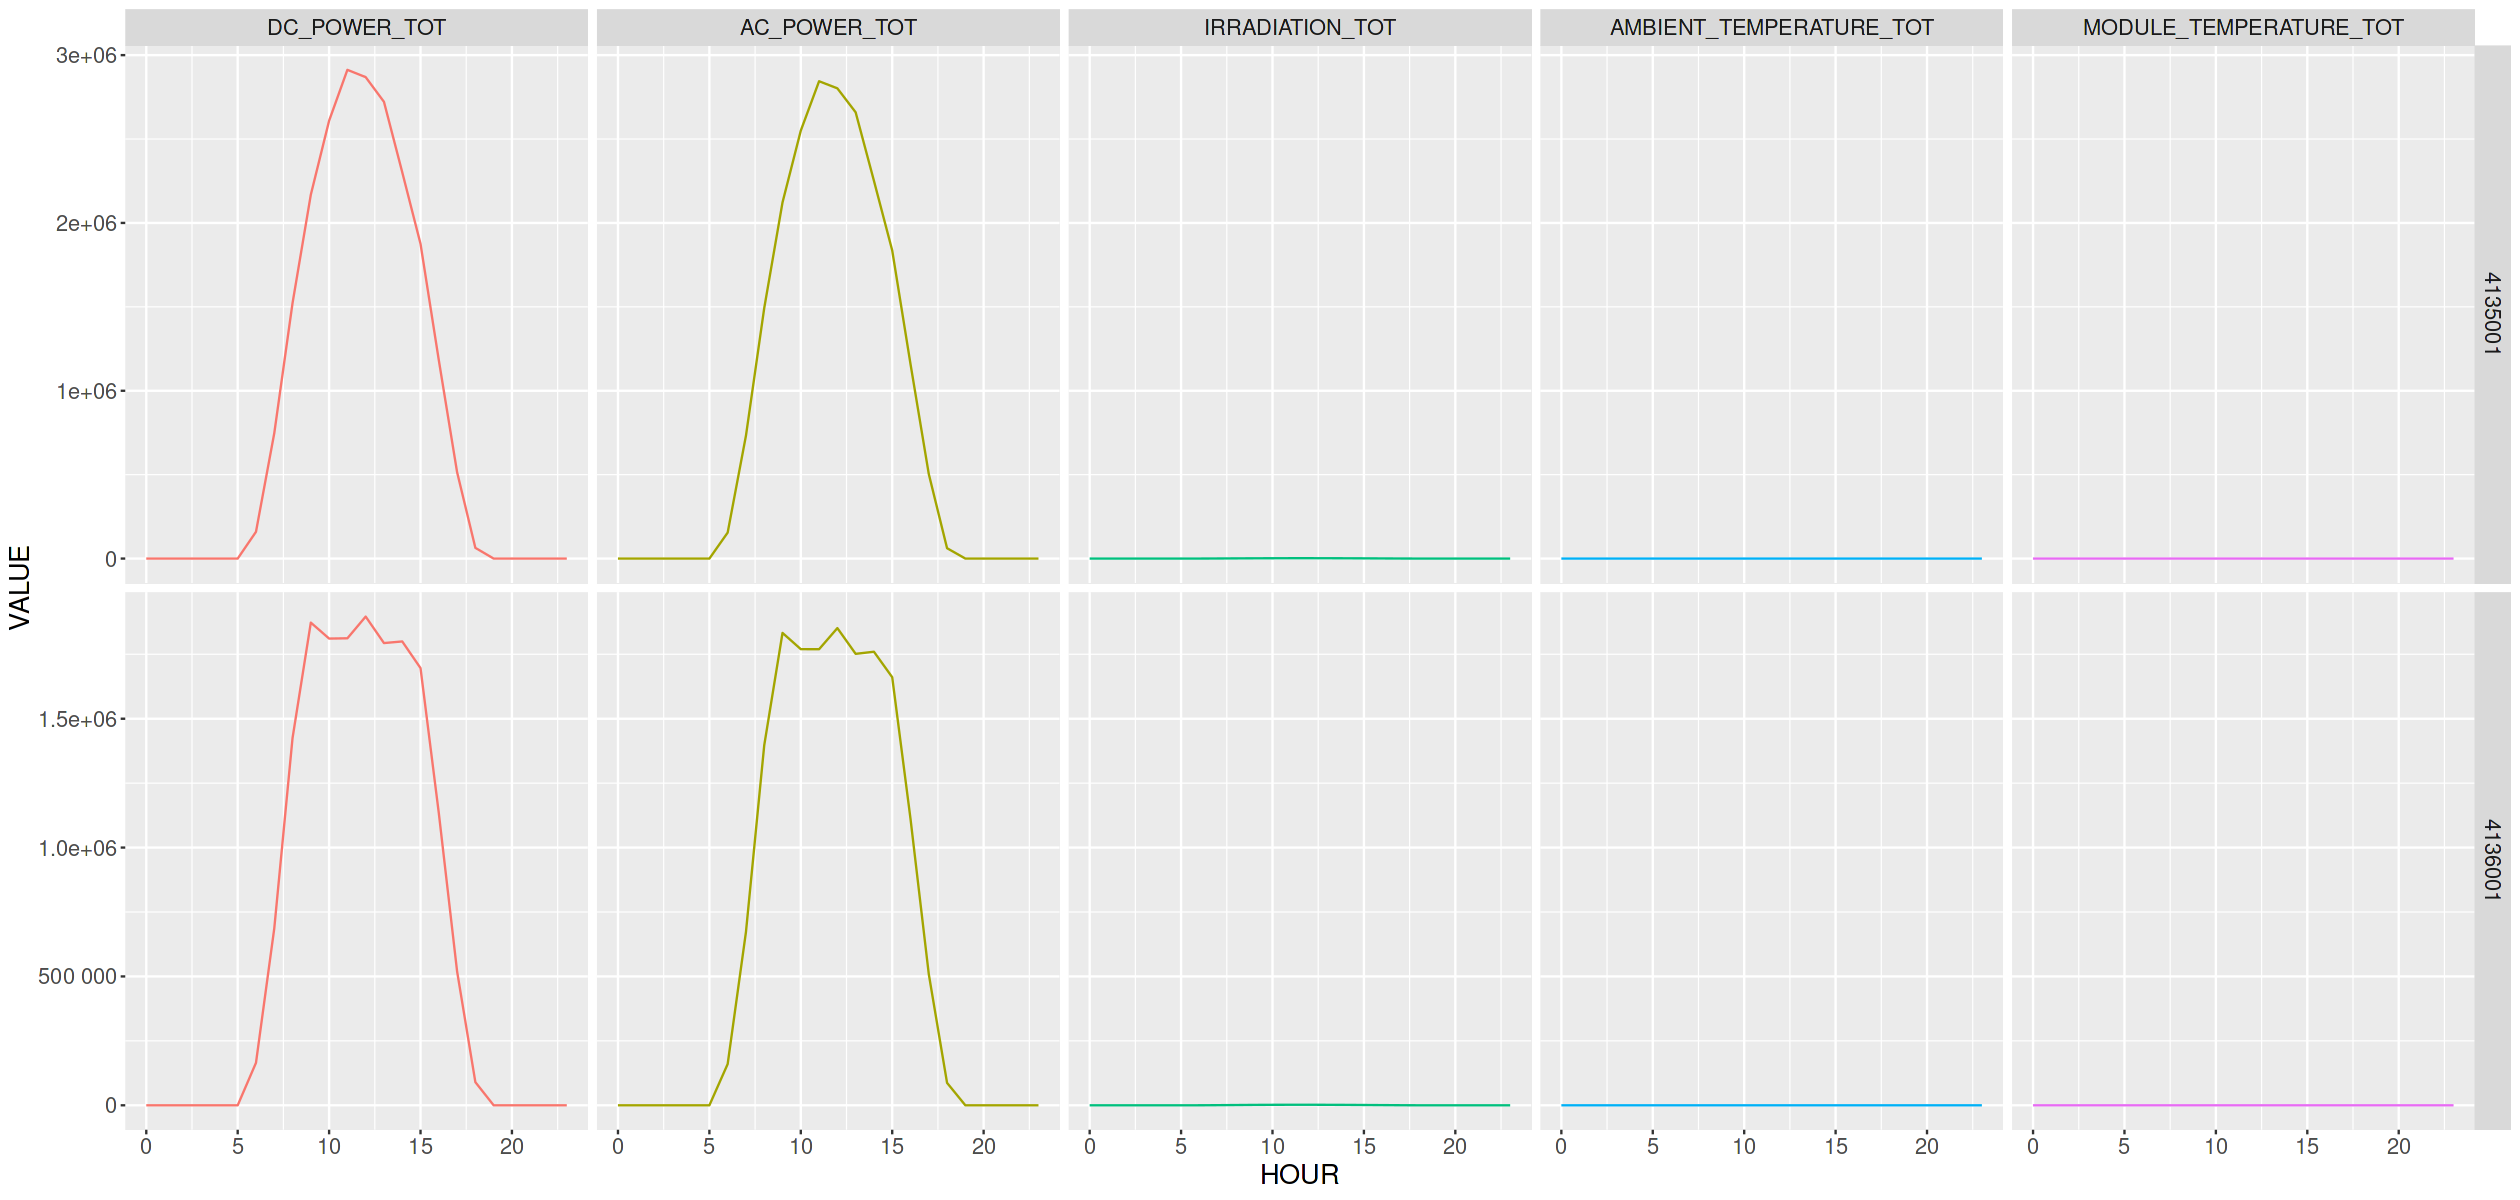

In [ ]:
# Creating the dataset
data_hour <-
    data_group(c(HOUR)) %>%
        pivot_longer(DC_POWER_TOT:IRRADIATION_TOT, names_to = "VAR", values_to = "VALUE")

# Arranging
data_hour$VAR = fct_relevel(data_hour$VAR,
    c("DC_POWER_TOT",
    "AC_POWER_TOT",
    "IRRADIATION_TOT",
    "AMBIENT_TEMPERATURE_TOT",
    "MODULE_TEMPERATURE_TOT"))

# Generation and Radiation Plot - BAD
data_hour %>%
    ggplot(aes(x = HOUR, y = VALUE, color = VAR)) +
    geom_line() +
    scale_y_continuous(labels = label_number_auto()) +
    facet_grid(PLANT_ID ~ VAR, scales = "free_y") +
    theme(legend.position = "None", text = element_text(size = 16))

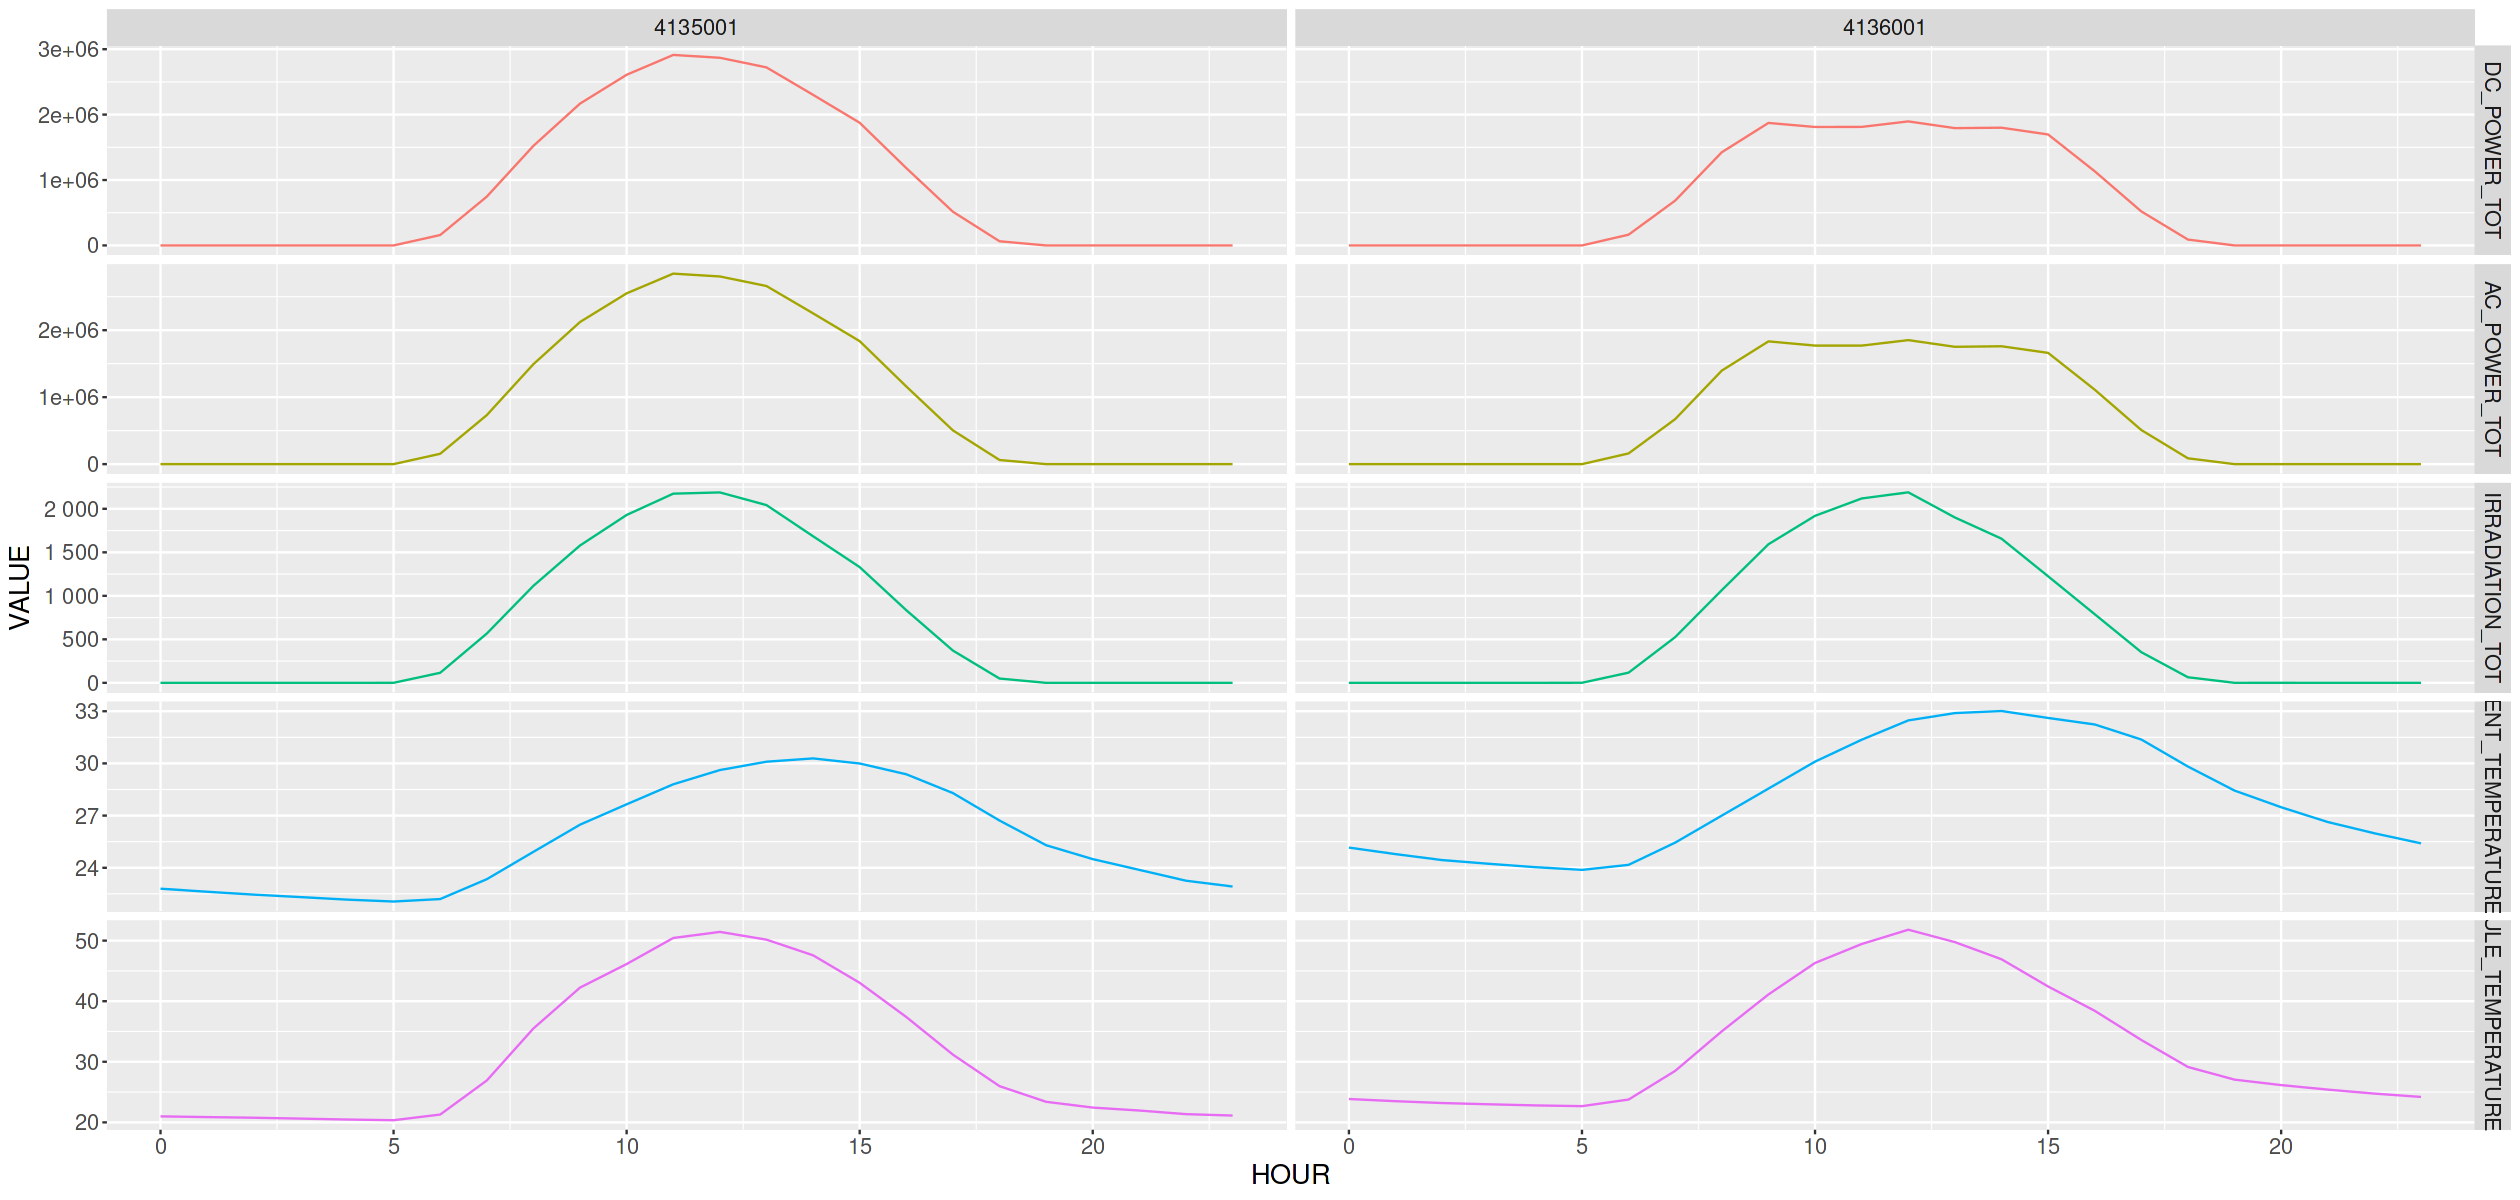

In [ ]:
# Generation and Radiation Plot - NOT TOO GOOD
data_hour %>%
    ggplot(aes(x = HOUR, y = VALUE, color = VAR)) +
    geom_line() +
    scale_y_continuous(labels = label_number_auto()) +
    facet_grid(VAR ~ PLANT_ID, scales = "free_y") +
    theme(legend.position = "None", text = element_text(size = 16))

As we expected, the variables are strongly correlated.
Let's see this on a scatter plot.

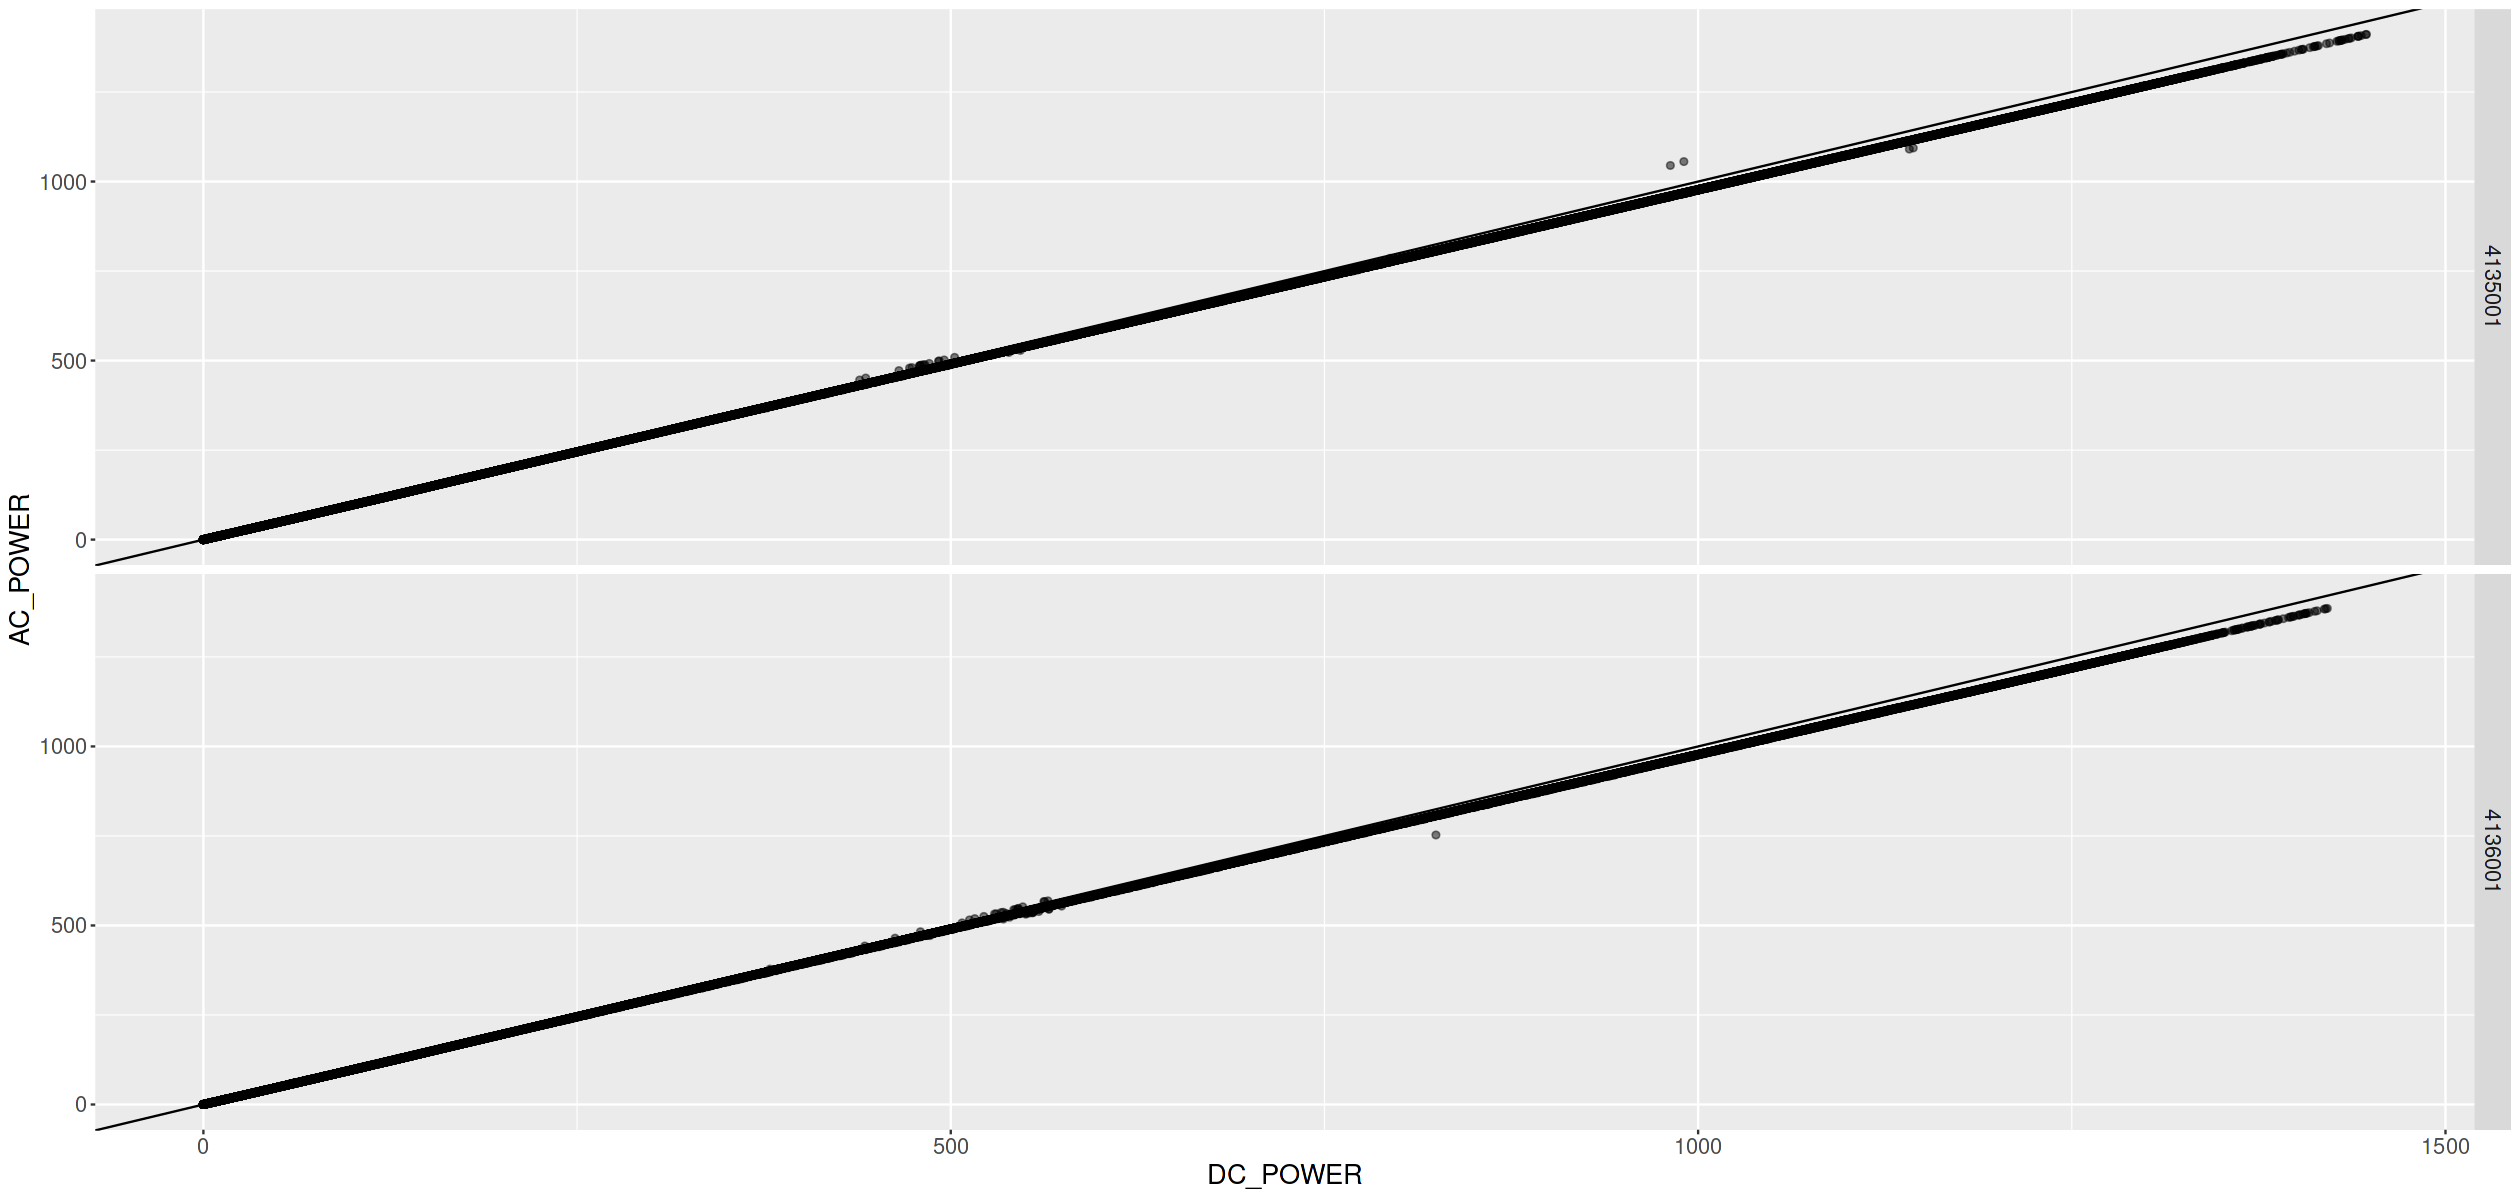

In [ ]:
data_gen_wthr %>%
    ggplot(aes(x = DC_POWER, y = AC_POWER)) +
    geom_point(alpha = 0.5) +
    geom_abline(aes(intercept = 0, slope = 1)) + 
    facet_grid(PLANT_ID ~ .) +
    theme(legend.position = "None", text = element_text(size = 16))

Weel, there are some moments that AC_POWER is greater than DC_POWER.
Let's see this points

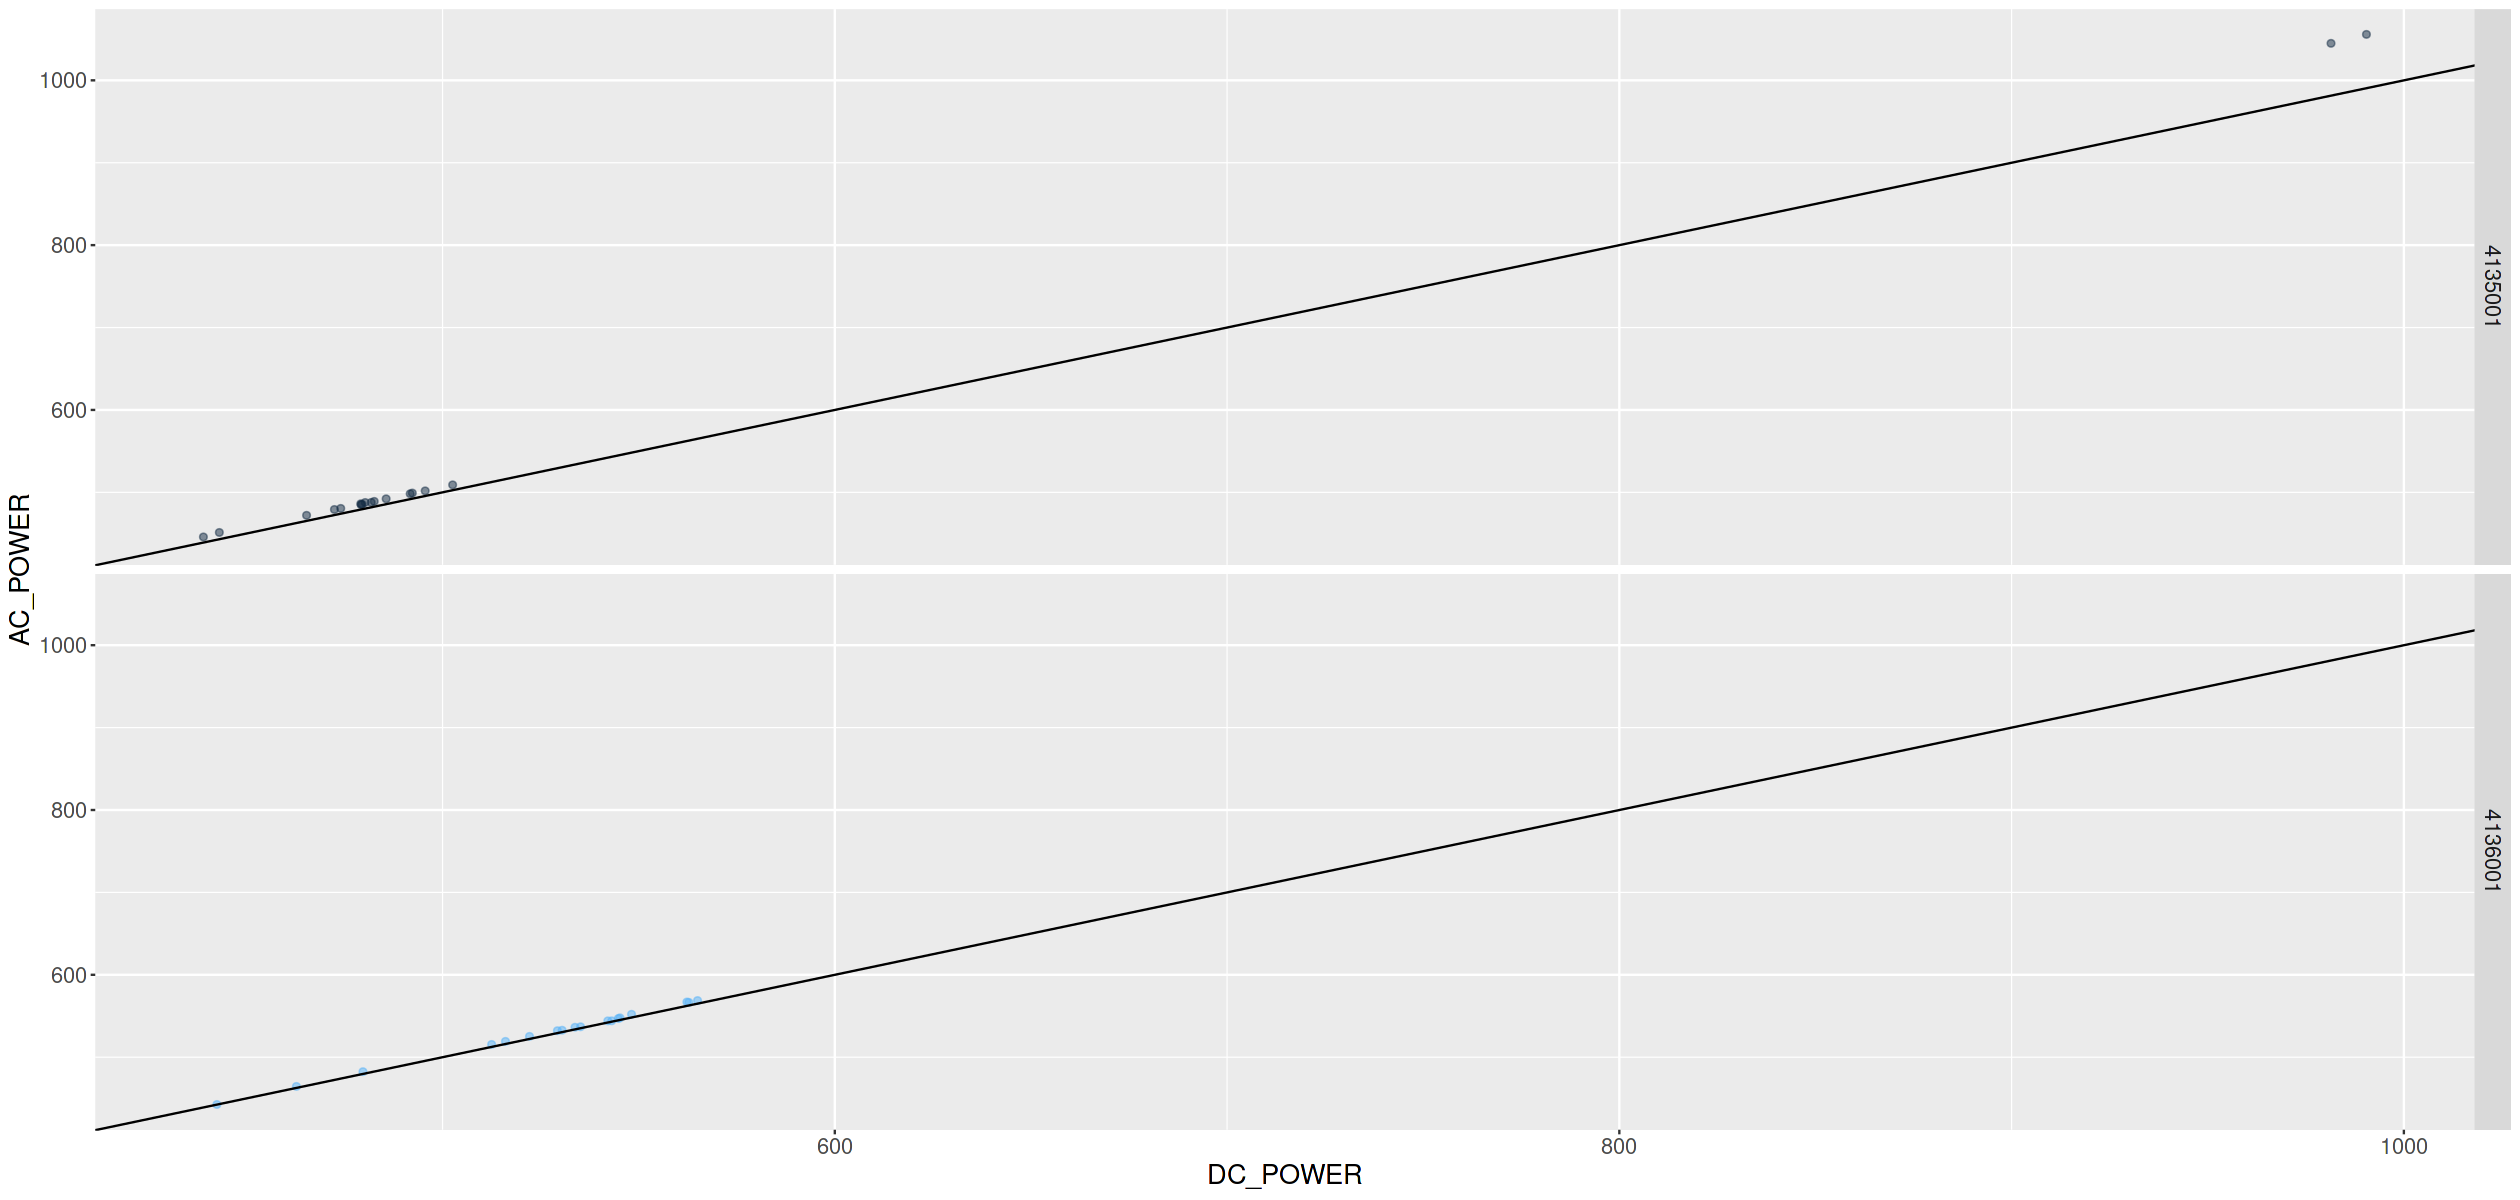

In [ ]:

data_gen_wthr %>%
    filter(AC_POWER > DC_POWER) %>%
    ggplot(aes(x = DC_POWER, y = AC_POWER, color = PLANT_ID)) +
    geom_point(alpha = 0.5) +
    geom_abline(aes(intercept = 0, slope = 1)) + 
    facet_grid(PLANT_ID ~ .) +
    theme(legend.position = "None", text = element_text(size = 16))

There are around 30 points with this situation. If we were at a company, maybe this could be more explored.
Let's generation and irradiation.

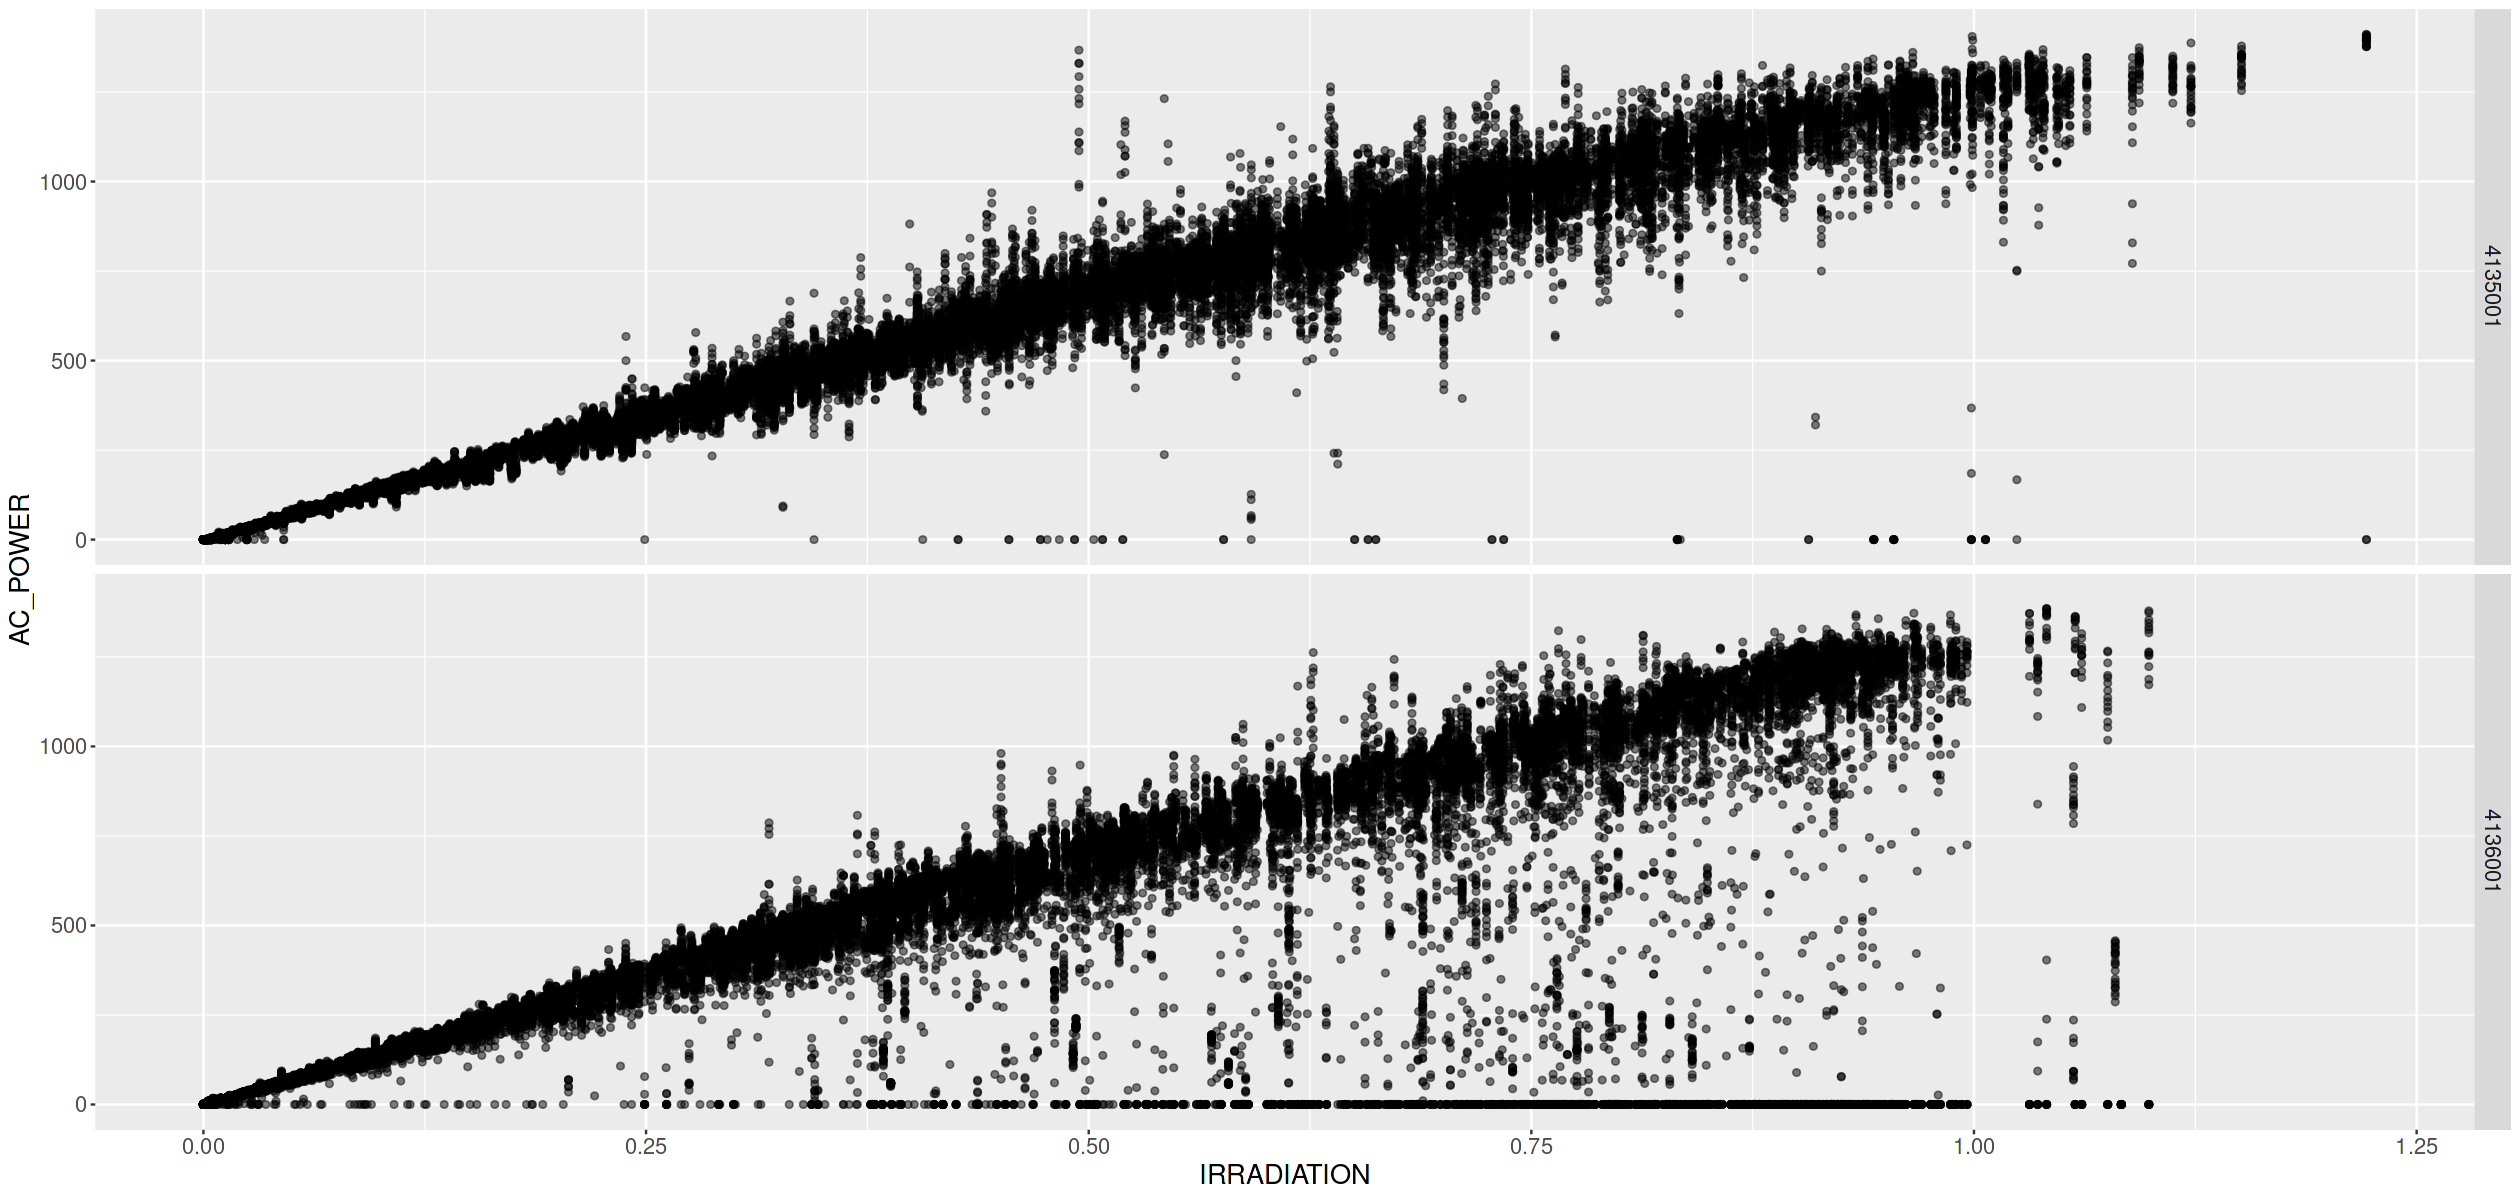

In [ ]:
data_gen_wthr %>%
    ggplot(aes(x = IRRADIATION, y = AC_POWER)) +
    geom_point(alpha = 0.5) +
    facet_grid(PLANT_ID ~ .) +
    theme(legend.position = "None", text = element_text(size = 16))

Let's see these points where Irradiation is greater than 0 and generation is 0.
We have three options:
1. It is sunrise or sunset;
2. The inverter needs maintenance; or,
3. It is bad value.

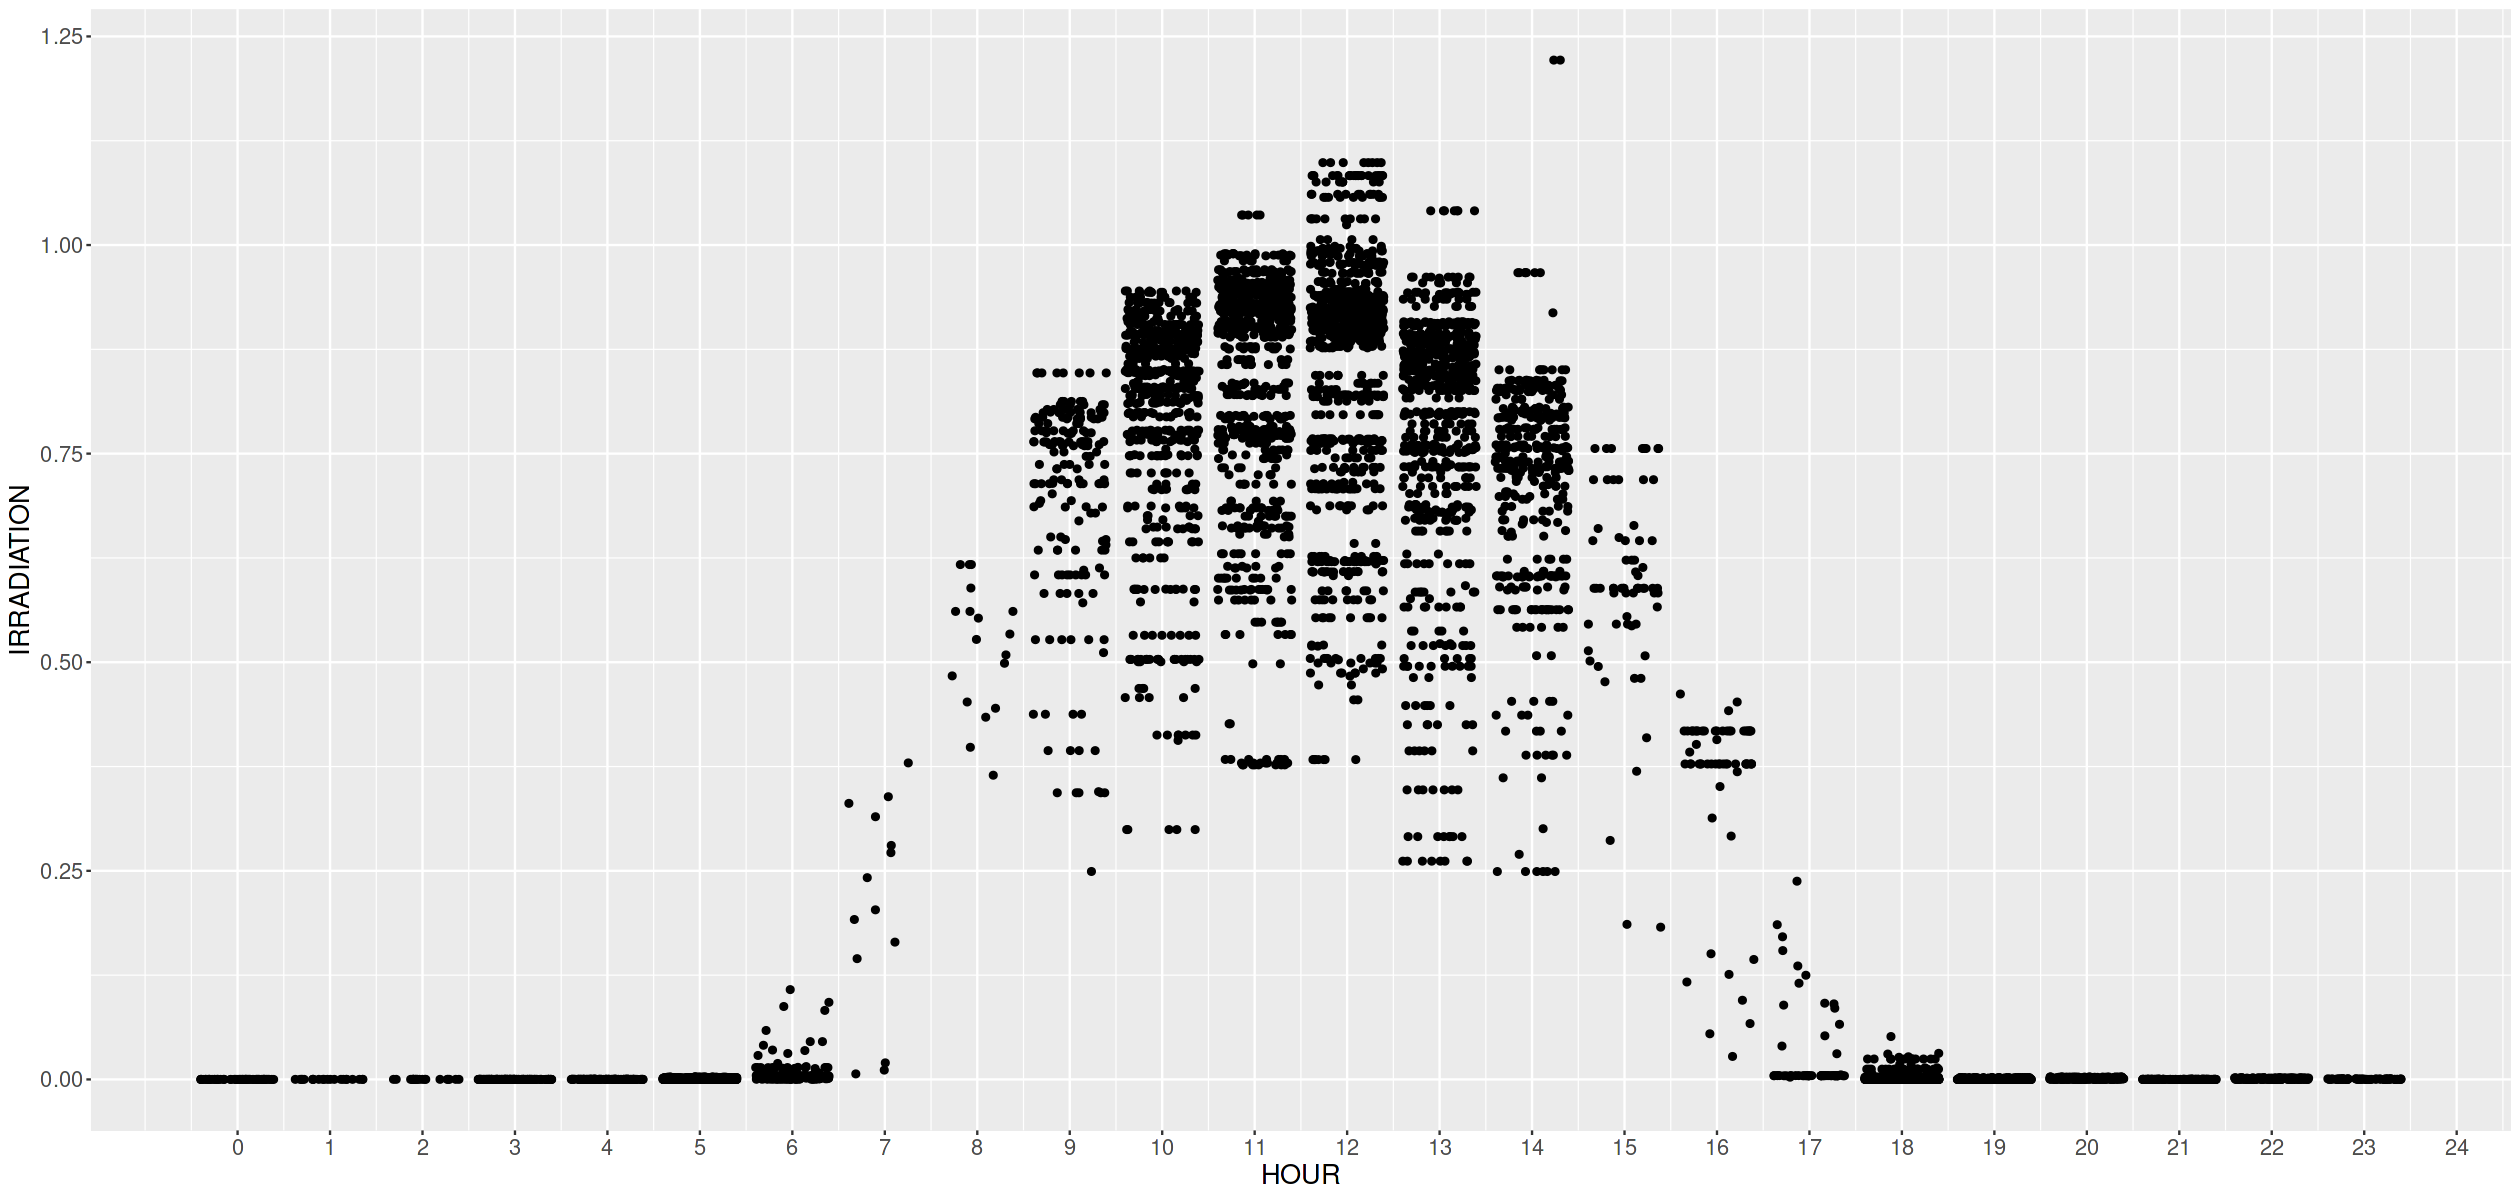

In [ ]:
data_gen_wthr %>%
    filter(AC_POWER == 0 & IRRADIATION != 0) %>%
    ggplot(aes(x = HOUR, y = IRRADIATION)) +
    geom_jitter() +
    scale_x_continuous(breaks = 0:24) +
    theme(legend.position = "None", text = element_text(size = 16))

The last plot shows us two things:
1. You can use a pair with AC_POWER and IRRADIATION to identify inverters that need maintenance; and
2. We need to find a cut point where small irradiation do not generate electricity.

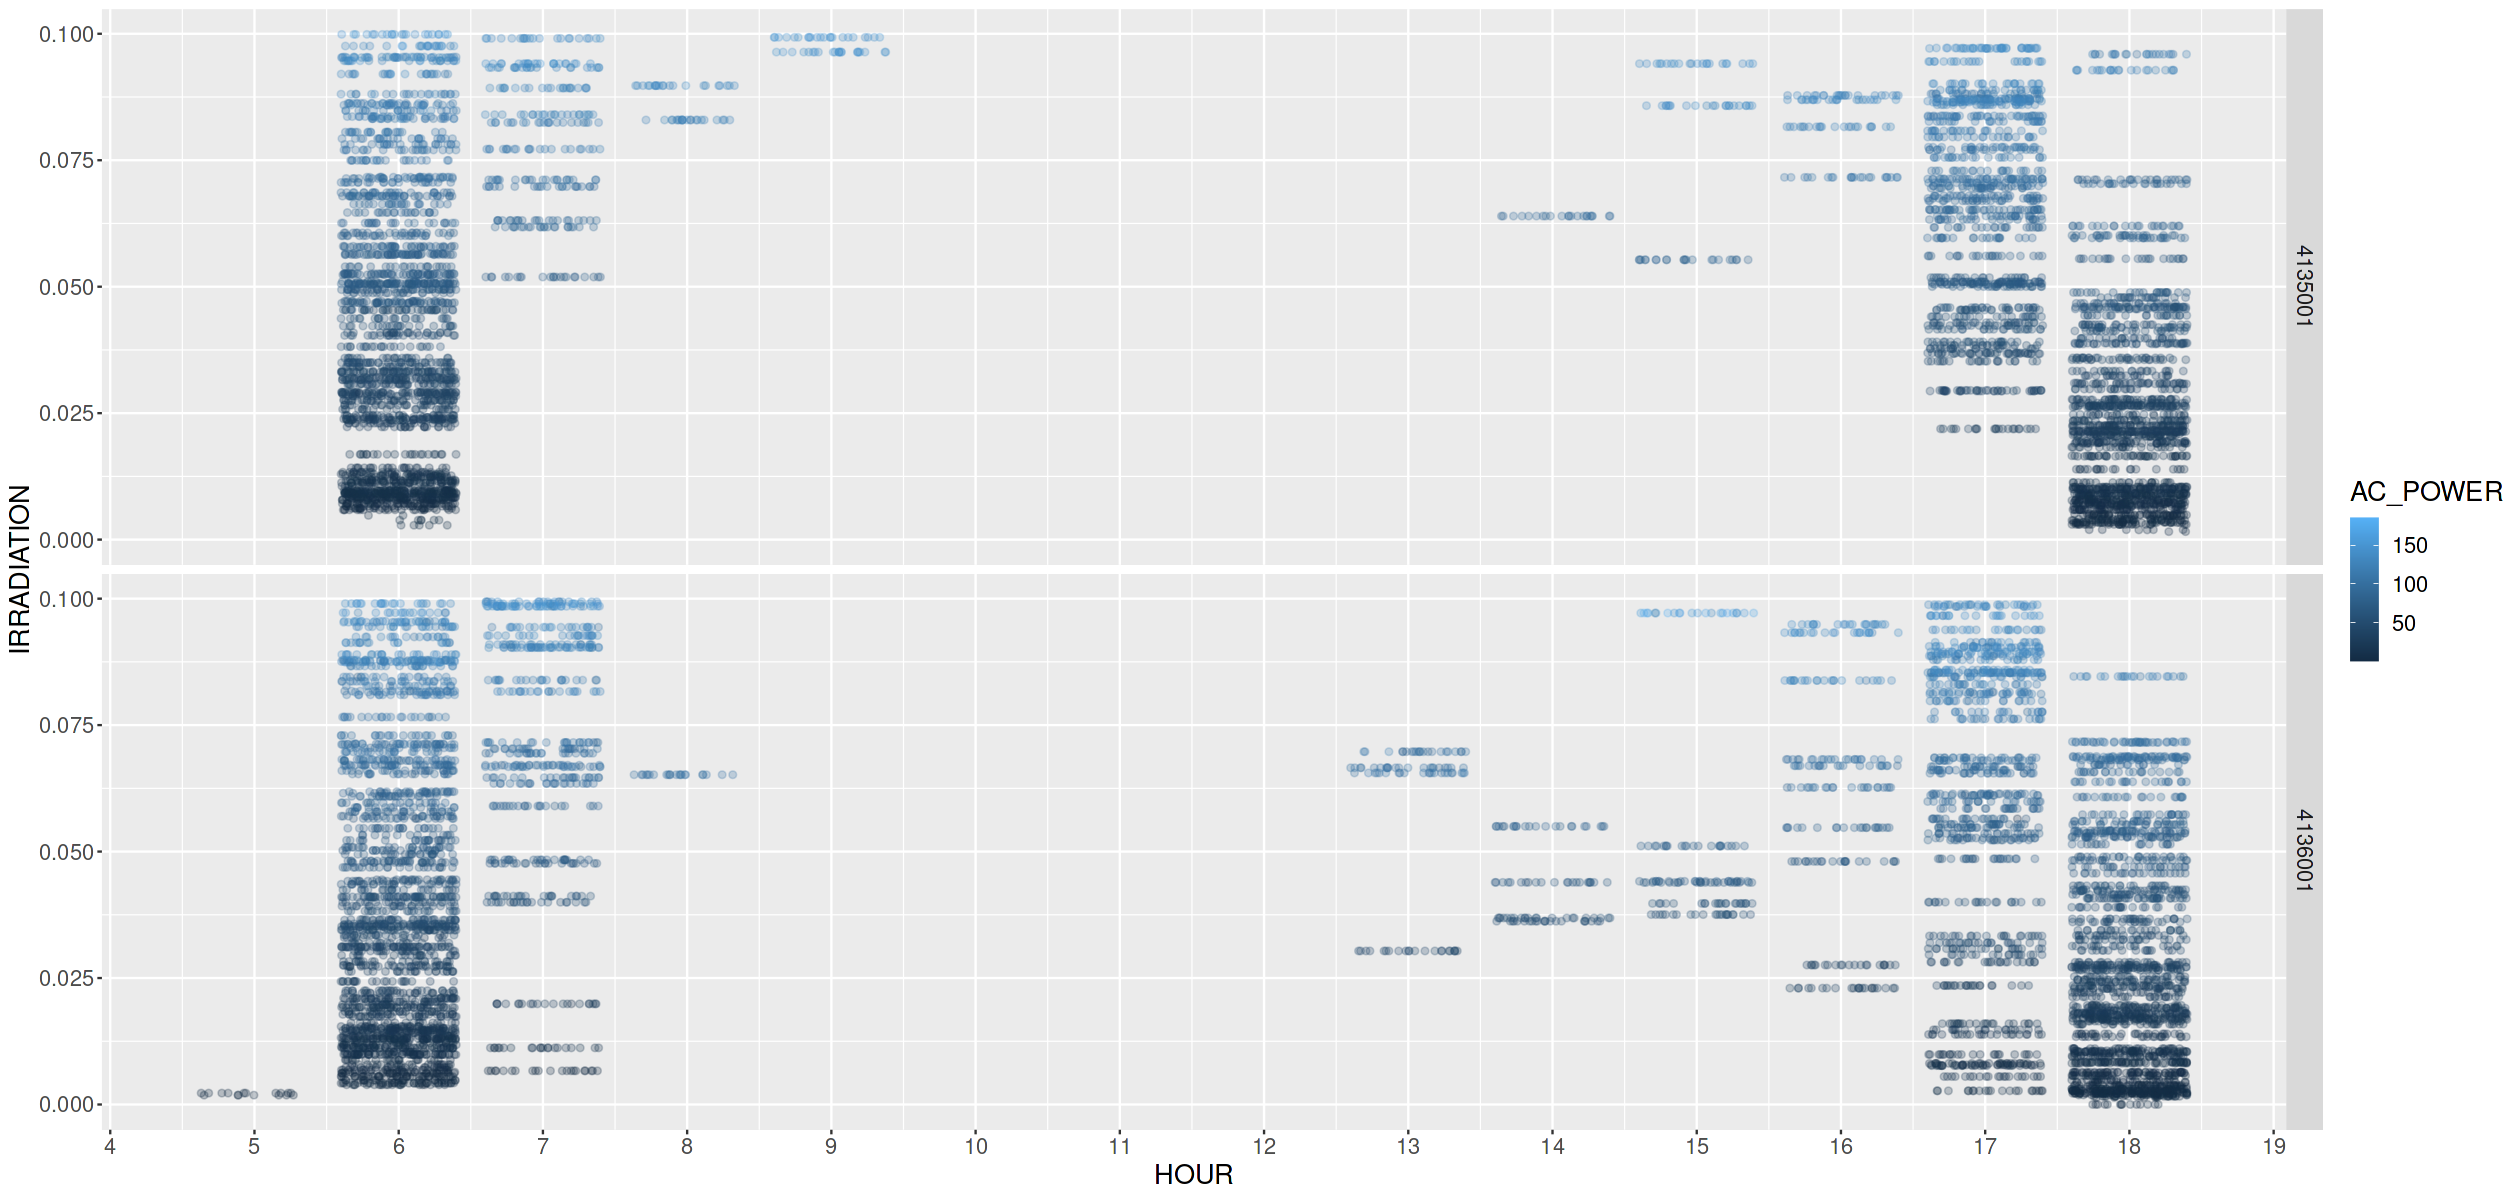

In [ ]:
data_gen_wthr %>%
    filter(AC_POWER != 0 & IRRADIATION < 0.1) %>%
    ggplot(aes(x = HOUR, y = IRRADIATION, color = AC_POWER)) +
    geom_jitter(alpha = 0.25) +
    scale_x_continuous(breaks = 0:24) + 
    facet_grid(PLANT_ID ~ .) +
    theme(text = element_text(size = 16))

Based on our last plot, we will use 0.1 as the cut point.
On this way, if AC_POWER is 0 and IRRADIATION is greater than 0.1, the inverter needs maintenance.
This cut point will be use later. Let's wait!
Let's ambient temperature and irradiation

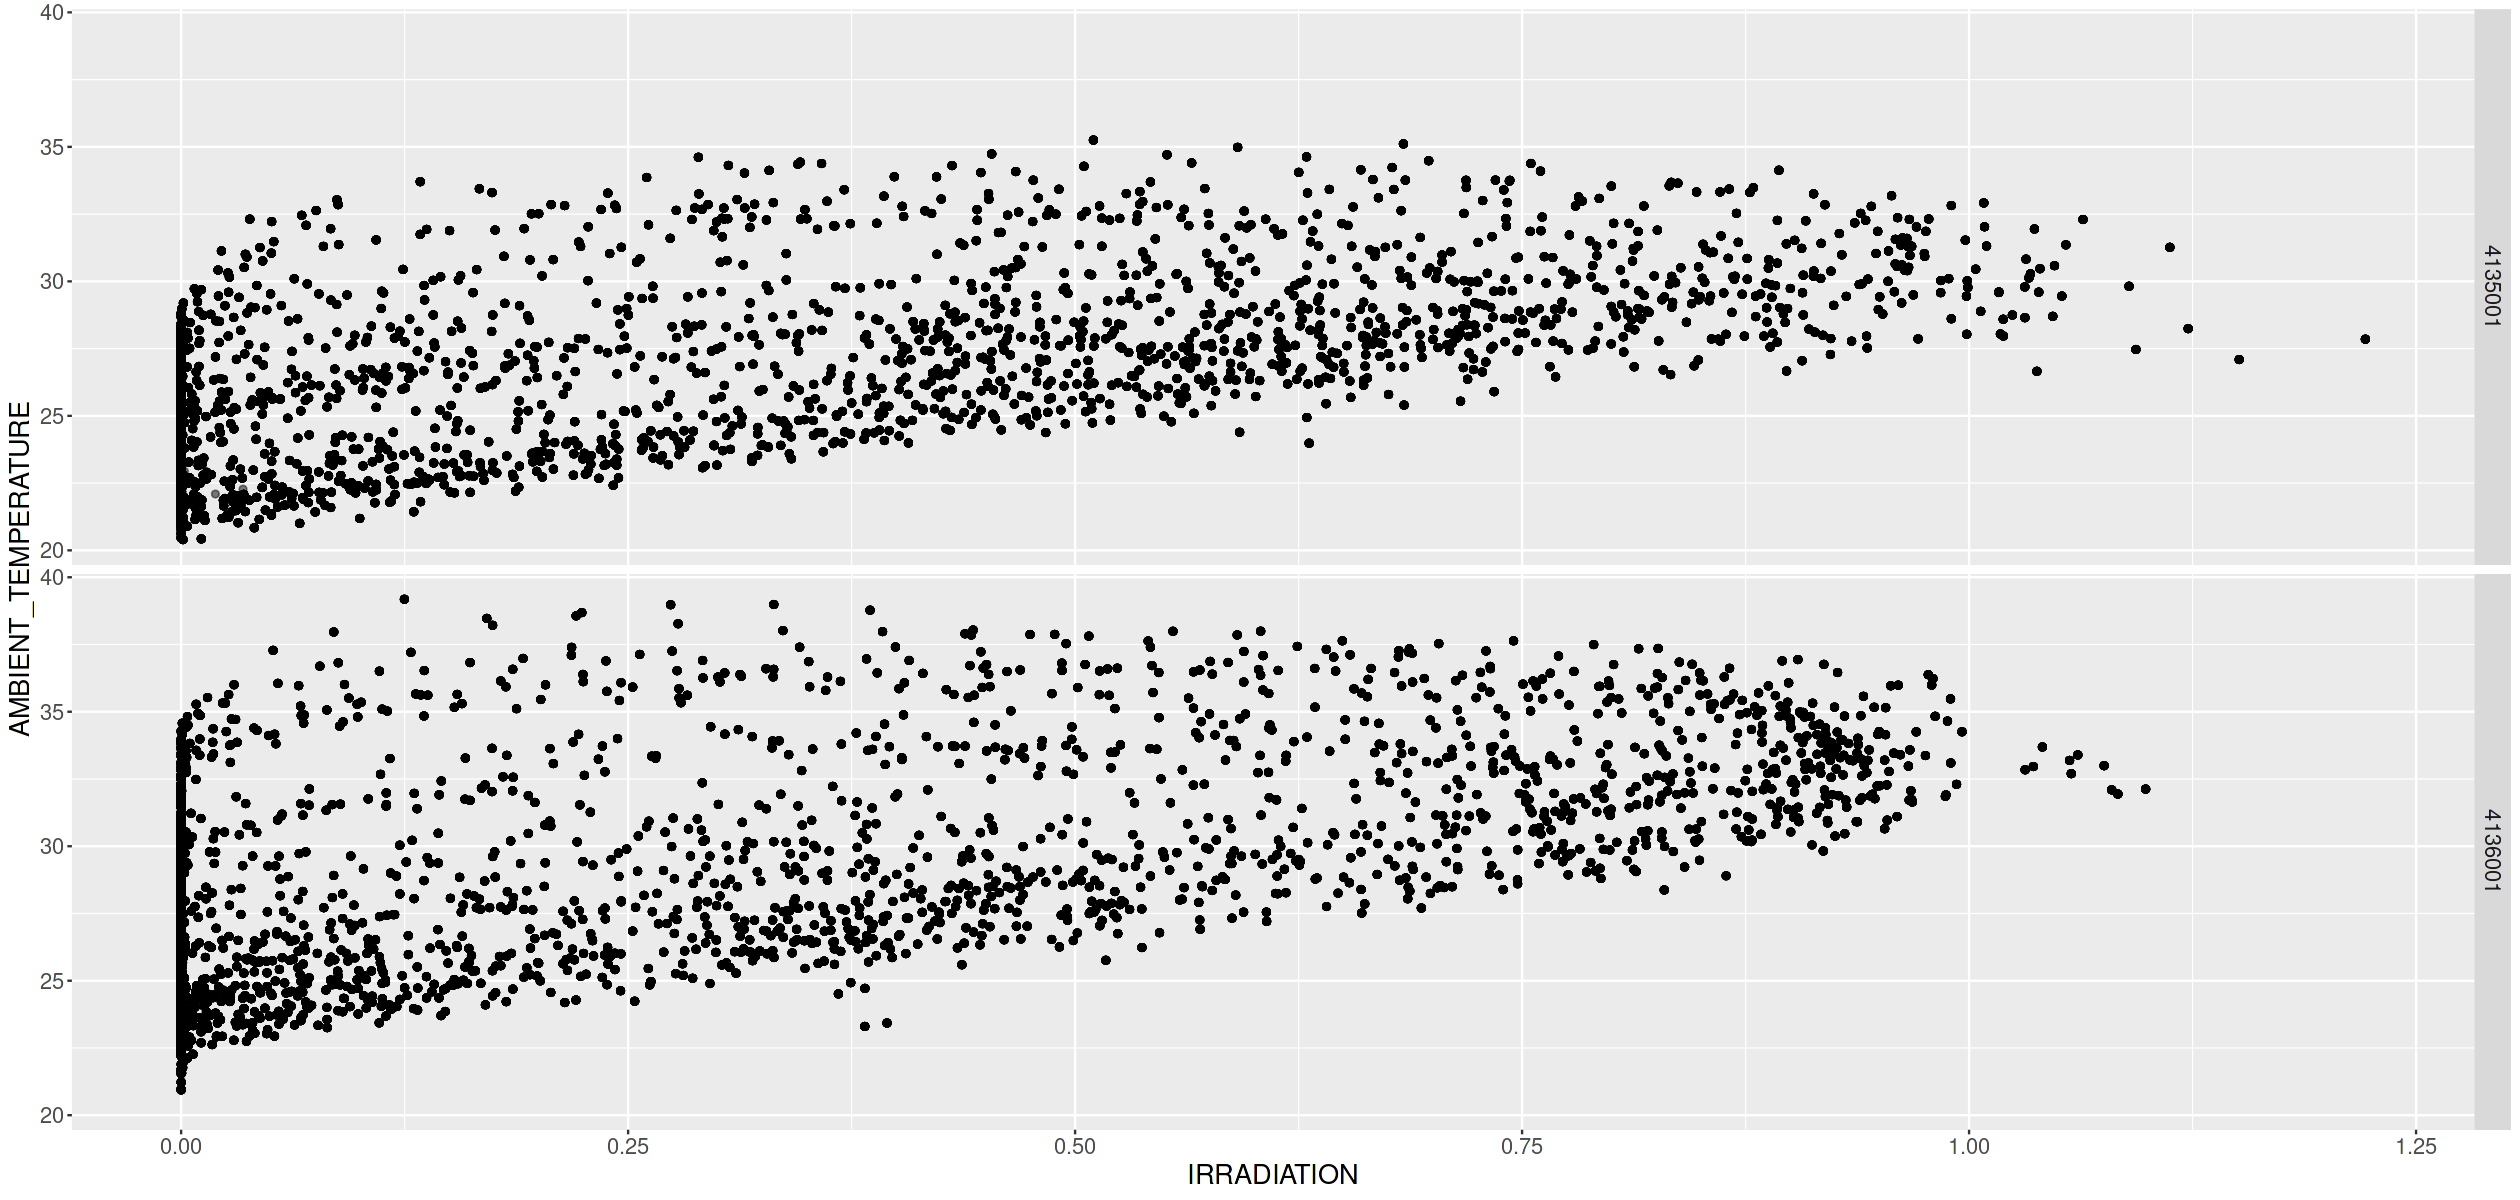

In [ ]:
data_gen_wthr %>%
    ggplot(aes(x = IRRADIATION, y = AMBIENT_TEMPERATURE)) +
    geom_point(alpha = 0.5) +
    facet_grid(PLANT_ID ~ .) +
    theme(legend.position = "None", text = element_text(size = 16))

The ambient temperature seems not a strongly relation with the irradiation.
Let’s see the module temperature.

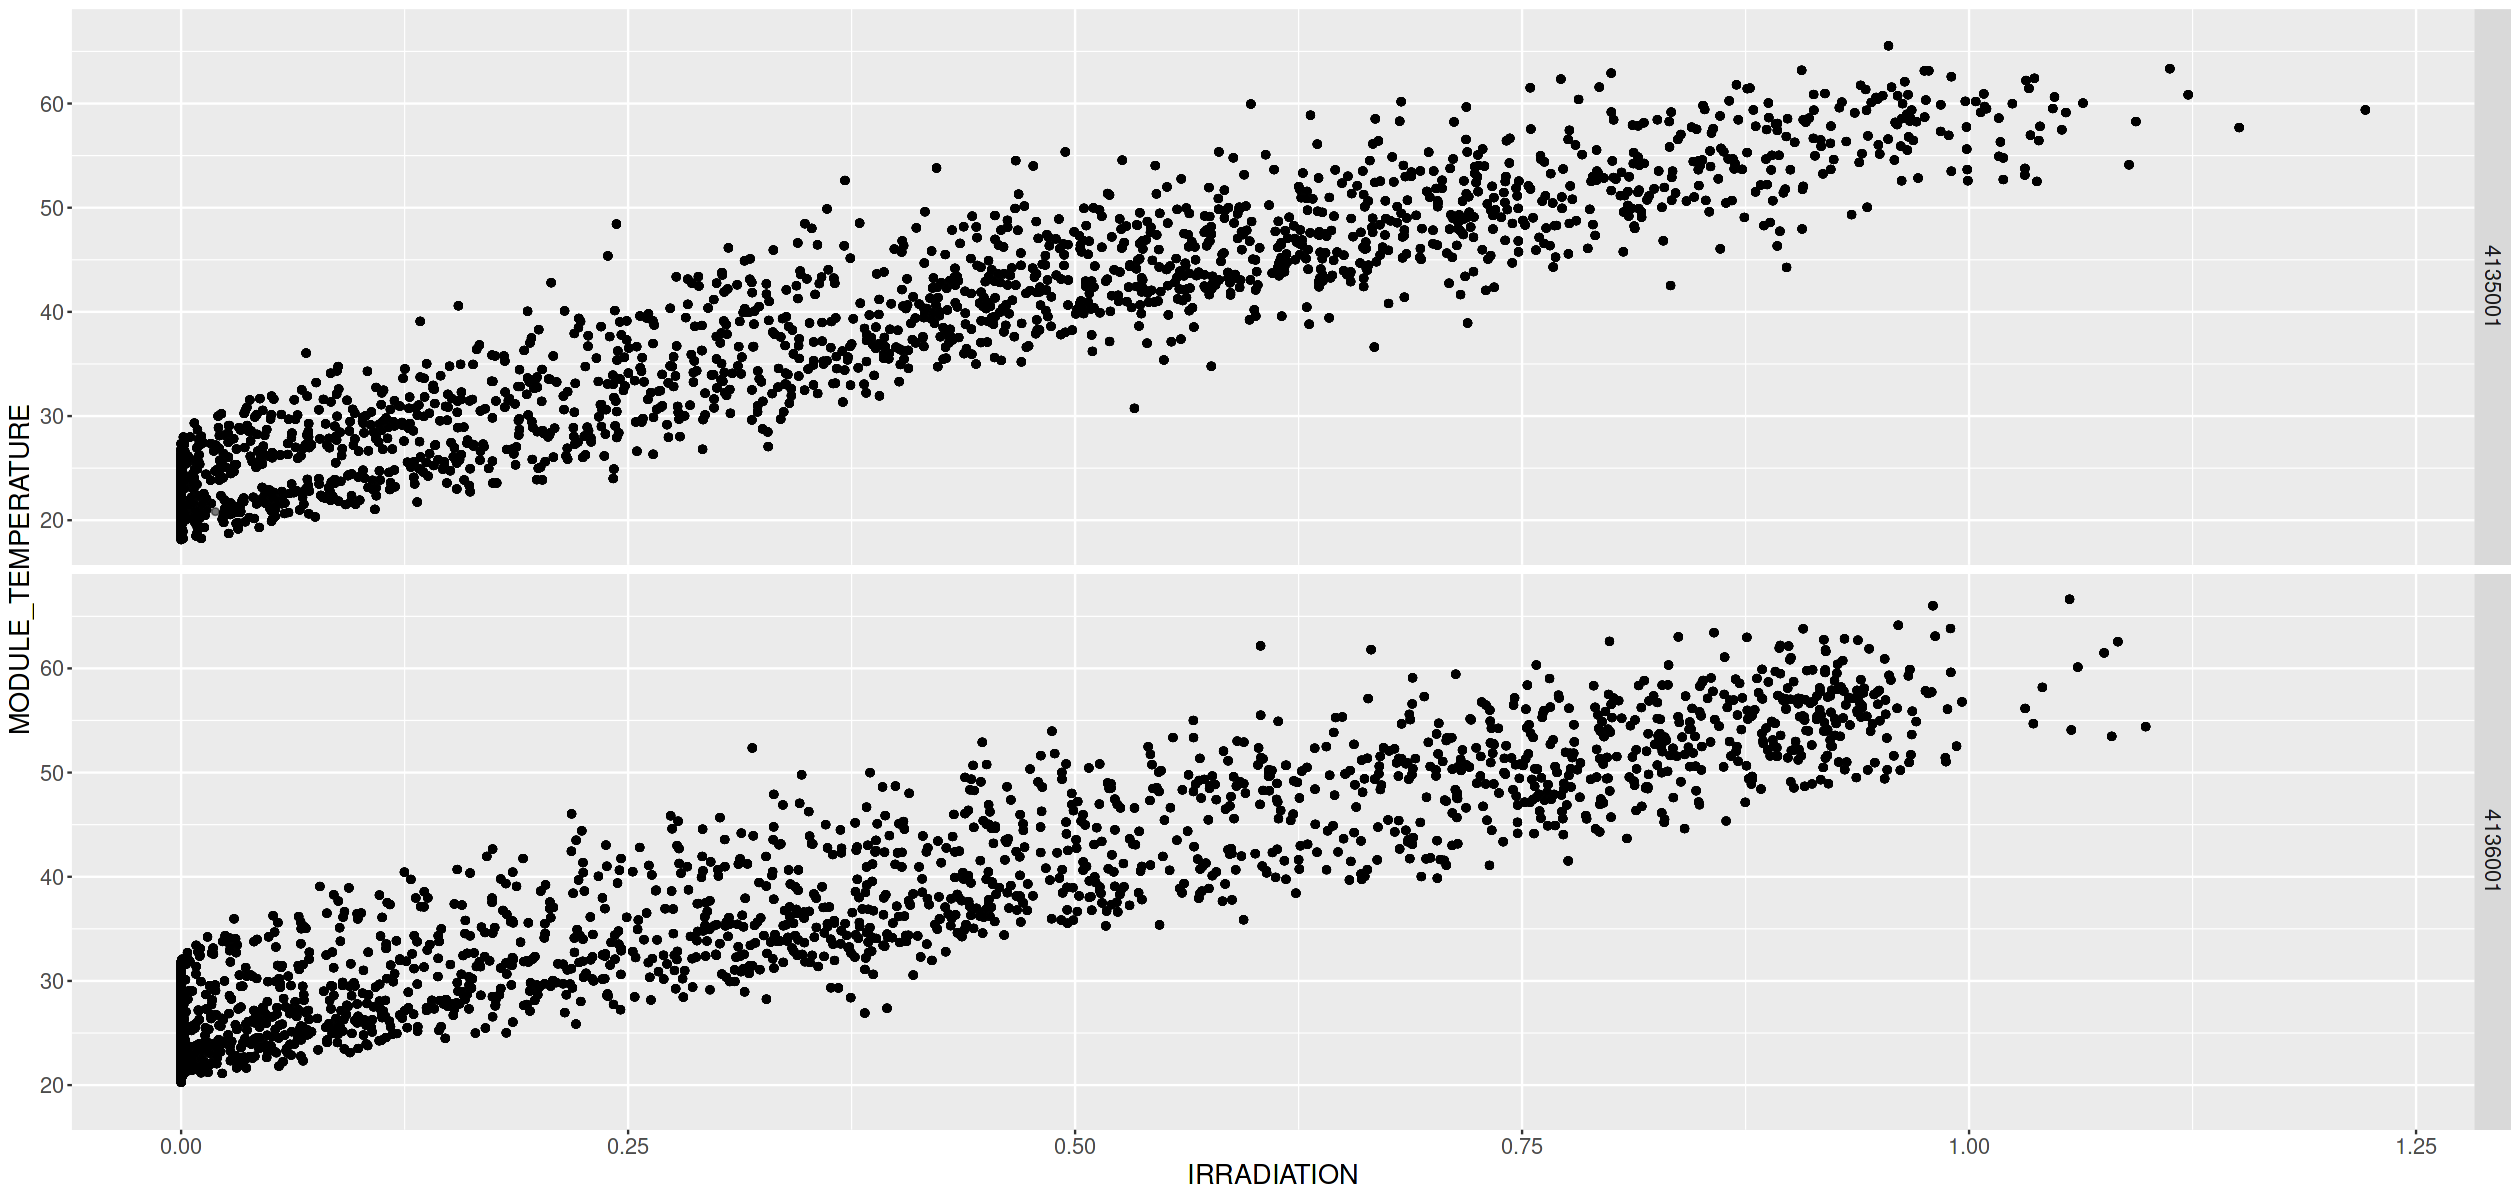

In [ ]:
data_gen_wthr %>%
    ggplot(aes(x = IRRADIATION, y = MODULE_TEMPERATURE)) +
    geom_point(alpha = 0.5) +
    facet_grid(PLANT_ID ~ .) +
    theme(legend.position = "None", text = element_text(size = 16))

The module temperature is correlated with the irradiation.
Let’s see the correlation between the module and ambient temperature.

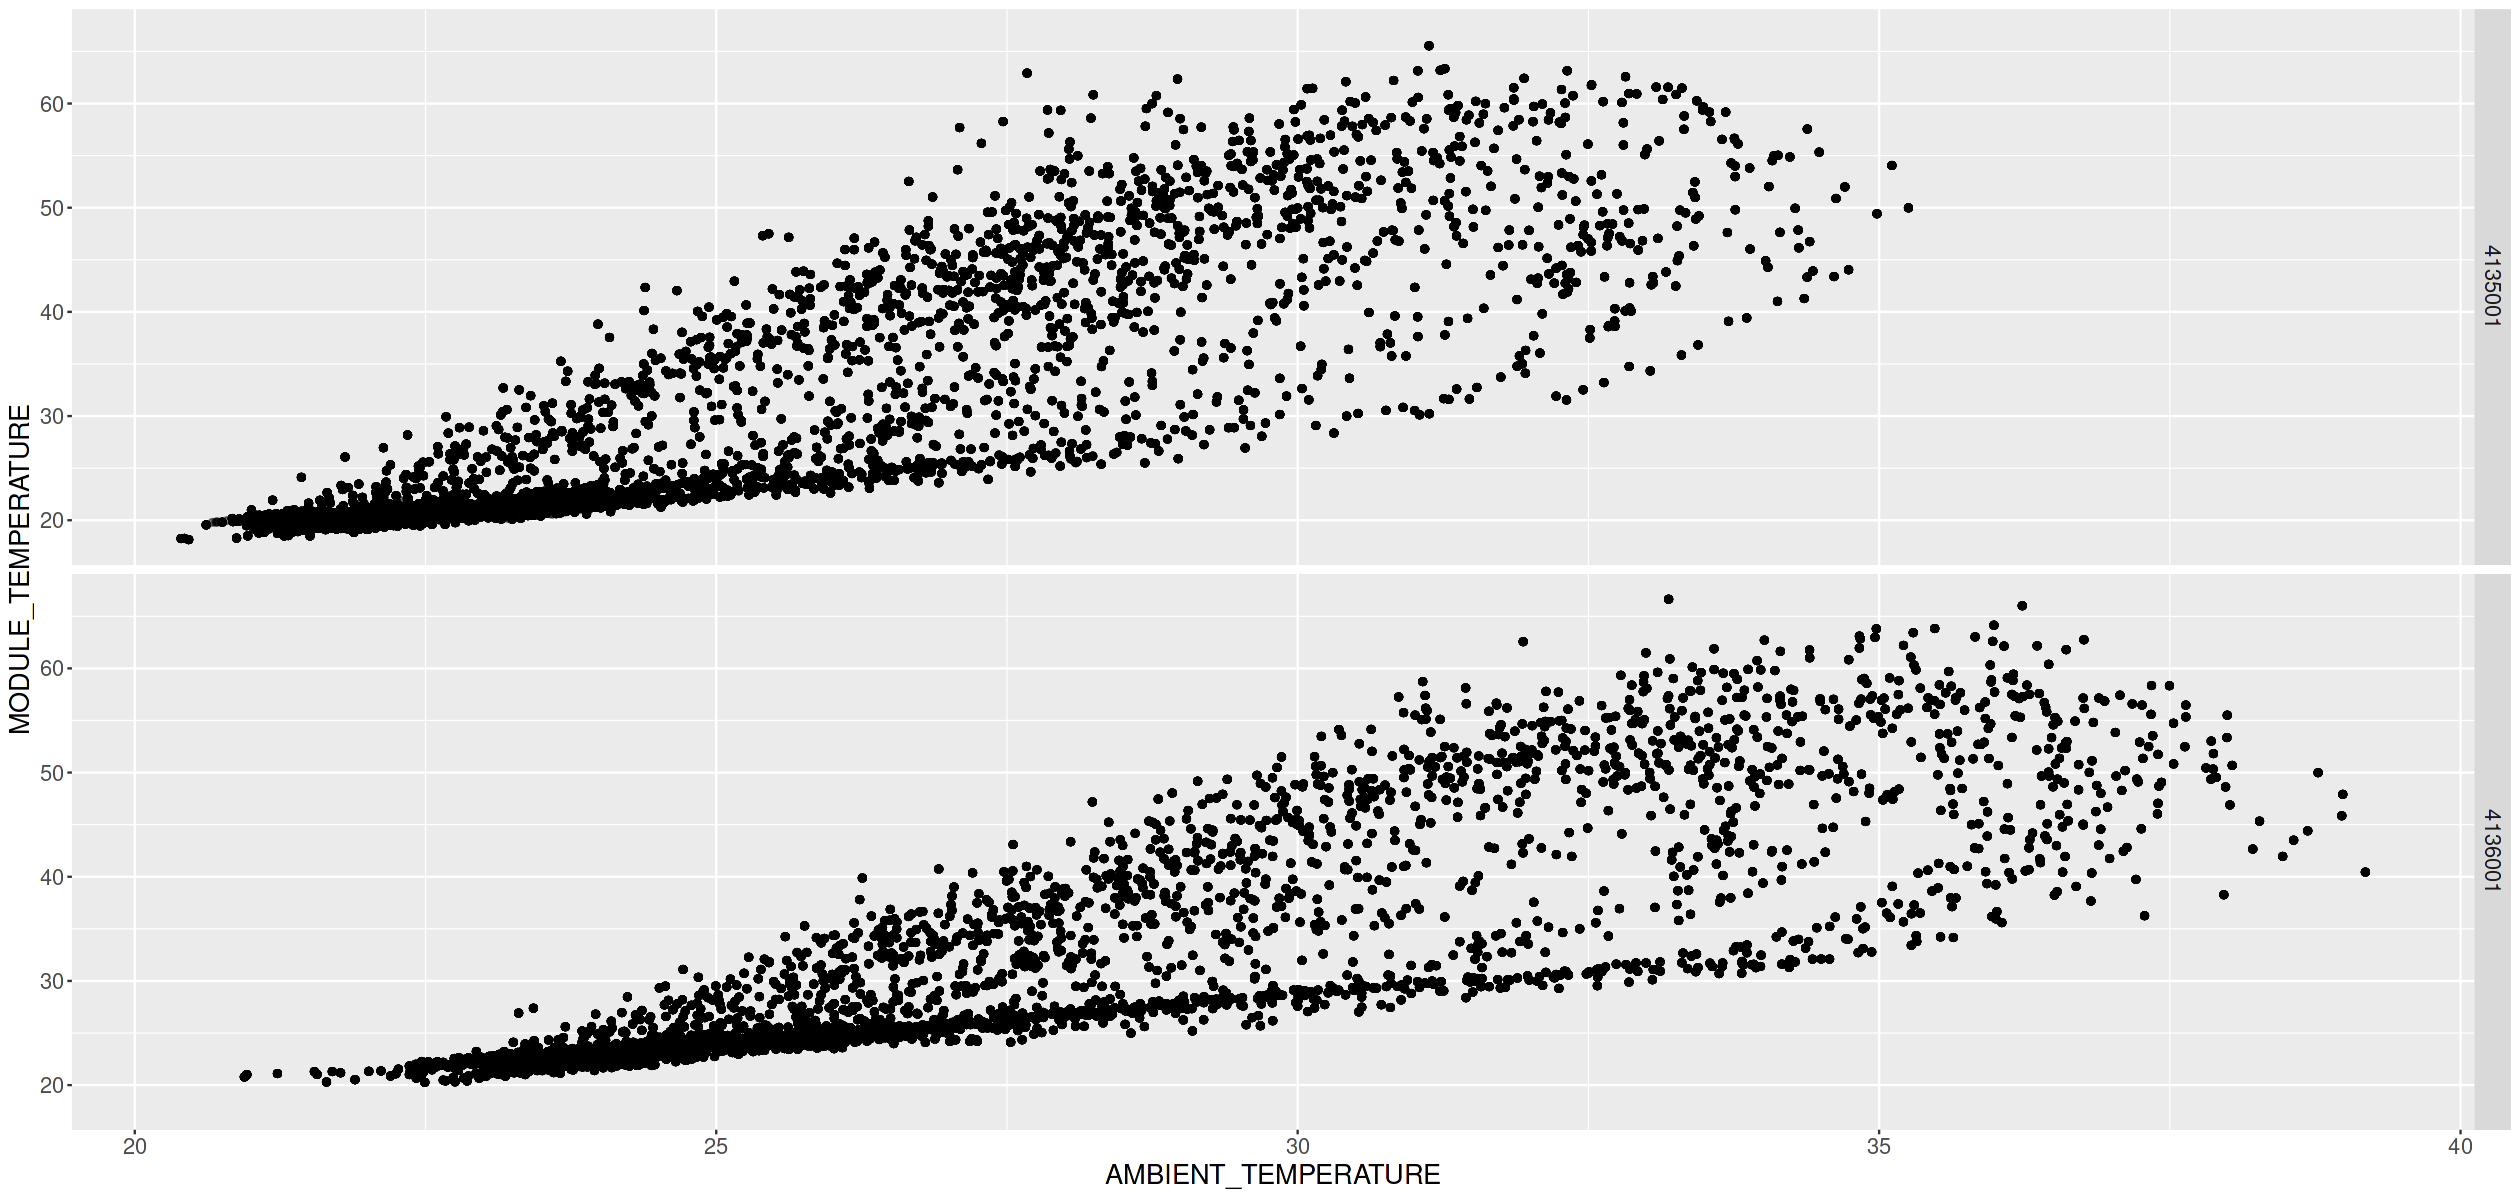

In [ ]:
data_gen_wthr %>%
    ggplot(aes(x = AMBIENT_TEMPERATURE, y = MODULE_TEMPERATURE)) +
    geom_point(alpha = 0.5) +
    facet_grid(PLANT_ID ~ .) +
    theme(legend.position = "None", text = element_text(size = 16))

Well, these variables seem to be correlated, but maybe apply a transformation could improve this.
For now, we will not do anything and use these two raw.
Let's calculate the correlation matrix.
We will drop the zero value to avoid maintenance.

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5)
data_gen_wthr %>%
    select(where(is.numeric), -PLANT_ID, -WEEK, -HOUR) %>%
    na_if(0) %>%
    drop_na() %>%
    cor() %>%
    ggcorrplot(hc.order = TRUE,
               type = "upper",
               colors = c("red", "white", "green"),
               lab = TRUE)

ERROR: [1m[33mError[39m in `na_if()`:[22m
[33m![39m Can't convert `y` <double> to match type of `x` <tbl_df>.


Well, the last plot shows that our variables are strong correlated. With this information, we can create a model to predict the values. Let’s move to the next section!

# Modeling Challenge

Before we start our modeling, let's review the questions asked by Ani Kannal:

1. Can we predict the power generation for next couple of days? - this allows for better grid management

2. Can we identify the need for panel cleaning/maintenance?

3. Can we identify faulty or suboptimally performing equipment?

Using only the data provided, I do not believe that our model will be assertive. Maybe, a model that you take the irradiation and the ambient temperature to predict the generation is the better option for this question. Therefore, I will save time on this and use it on the other two questions starting by analyzing the performance of the inverters. It is important to remember that all inverters from a same plant receive the same conditions to generate energy, so let's start analyzing them performances.

## Inverters Perfomances

We can split the inverter into two performances sections:

a. Solar to DC Power, or, solar efficiency (sol_eff); and,

b. DC to AC Power, or, electric efficiency (elec_eff).

Dust deposition on plates can decrease the solar efficiency. On the other hand, hardware problems could cause some decrease on electric efficiency.

In [ ]:
gen_wthr_eff <-
    data_gen_wthr %>%
        na_if(0) %>%
        drop_na() %>%
        mutate(
            ELEC_EFF = AC_POWER / DC_POWER,
            SOL_EFF = DC_POWER / IRRADIATION
        )

# Seeing the summary
gen_wthr_eff %>%
    select(ELEC_EFF:SOL_EFF) %>%
    summary()

Let’s start with electric efficiency. The situation where ELEC_EFF is greater than 1 is impossible. Probably this is a bad value and, considering that, we will drop these rows.

In [ ]:
gen_wthr_eff <-
    gen_wthr_eff %>%
        filter(ELEC_EFF < 1)

# Seeing the summary
gen_wthr_eff %>%
    select(ELEC_EFF:SOL_EFF) %>%
    summary()

It is important to see that our last step did not change the SOL_EFF. Now, let's visualize the ELEC_EFF with other variables to understand his behavior.

In [ ]:
options(repr.plot.width = 21, repr.plot.height = 10)
gen_wthr_eff %>%
    ggplot(aes(y = ELEC_EFF, x = SOURCE_KEY_INV)) +
    geom_boxplot() +
    facet_wrap(~ PLANT_ID, , scales = "free_y")  +
    coord_flip() + 
    theme(legend.position = "None", text = element_text(size = 16))

Well, this efficiency does not seem to show some trouble considering that meanings and IQRs are almost equal. Let’s advance to the solar efficiency. We will calculate solar efficiency as DC_POWER divided by IRRADIATION. In other words, this KPI is better when it is greater.

In [ ]:
gen_wthr_eff %>%
    ggplot(aes(y = SOL_EFF, x = SOURCE_KEY_INV)) +
    geom_boxplot() +
    facet_wrap(~ PLANT_ID, , scales = "free_y")  +
    coord_flip() + 
    theme(legend.position = "None", text = element_text(size = 16))

Looking these bar plots, there are some inverters that are under the solar efficiency expectation. 

To achieve our modeling goals let's take two groups of inverters. The first group performance will be used as the target generation with them high mean generation. Under the second group performance, the inverter needs to receive maintenance immediately.

We are using five because it is around 10% of all inverters, but we can try other number later. Let's begin with the 5 best inverts.

In [ ]:
inv_eff_best <-
    gen_wthr_eff %>%
        group_by(PLANT_ID, SOURCE_KEY_INV) %>%
        summarize(
            SOL_EFF_MEAN = mean(SOL_EFF)
        ) %>%
        ungroup() %>%
        arrange(desc(SOL_EFF_MEAN)) %>%
        slice(1:5)

Now that we take the inverters as references, let's start our modeling time. I will make two models: 1. with IRRADIATION, AMBIENT_TEMPERATURE and MODULE_TEMPERATURE; and 2. only with IRRADIATION and AMBIENT_TEMPERATURE. I will compare these two and choose what is better. It is important to remember that ambient temperature could bias the module temperature and this could have an affect on DC_POWER. So, I guess we can use AMBIENTE_TEMPERATURE without big lost.

In [ ]:
gen_wthr_eff_best <-
    gen_wthr_eff %>%
        semi_join(
            inv_eff_best,
            by = c("PLANT_ID", "SOURCE_KEY_INV")
        )

gen_wthr_mdl1 <-
    lm(
        formula = DC_POWER ~ IRRADIATION + AMBIENT_TEMPERATURE + MODULE_TEMPERATURE + 0,
        data = gen_wthr_eff_best
    )

gen_wthr_mdl2 <-
    lm(
        formula = DC_POWER ~ IRRADIATION + AMBIENT_TEMPERATURE + 0,
        data = gen_wthr_eff_best
    )

glance(gen_wthr_mdl1)
glance(gen_wthr_mdl2)

As I expected, we can use the Model 2 without a big lost. Let’s analyze if we improve it base on outliers, leverage, and influence.

In [ ]:
inv_eff_best_mdl <- gen_wthr_mdl2

inv_eff_best_mdl %>%
    augment() %>%
    select(DC_POWER:AMBIENT_TEMPERATURE,
           leverage = .hat,
           cooks_dist = .cooksd,
          ) %>%
    mutate(levarage_flag = leverage > 3*mean(leverage),
           cooks_dist_flag = cooks_dist > 3*mean(cooks_dist),
           flag = levarage_flag | cooks_dist_flag
          ) %>%
    filter(flag == FALSE) %>%
    select(DC_POWER:AMBIENT_TEMPERATURE) ->
    gen_wthr_eff_best_clear

inv_eff_best_mdl_clean <-
    lm(
        formula = DC_POWER ~ IRRADIATION + AMBIENT_TEMPERATURE + 0,
        data = gen_wthr_eff_best_clear
    )

glance(inv_eff_best_mdl)
glance(inv_eff_best_mdl_clean)

Well, after removing the higher leverage and Cock's distance observation, our model were improved!

Let's work now on our worst model.

In [ ]:
inv_eff_worst <-
    gen_wthr_eff %>%
        group_by(PLANT_ID, SOURCE_KEY_INV) %>%
        summarize(
            SOL_EFF_MEAN = mean(SOL_EFF)
        ) %>%
        ungroup() %>%
        arrange(SOL_EFF_MEAN) %>%
        slice(1:5)

gen_wthr_eff_worst <-
    gen_wthr_eff %>%
        semi_join(
            inv_eff_worst,
            by = c("PLANT_ID", "SOURCE_KEY_INV")
        )

gen_wthr_mdl2 <-
    lm(
        formula = DC_POWER ~ IRRADIATION + AMBIENT_TEMPERATURE + 0,
        data = gen_wthr_eff_worst
    )

inv_eff_worst_mdl <- gen_wthr_mdl2

inv_eff_worst_mdl %>%
    augment() %>%
    select(DC_POWER:AMBIENT_TEMPERATURE,
           leverage = .hat,
           cooks_dist = .cooksd,
          ) %>%
    mutate(levarage_flag = leverage > 3*mean(leverage),
           cooks_dist_flag = cooks_dist > 3*mean(cooks_dist),
           flag = levarage_flag | cooks_dist_flag
          ) %>%
    filter(flag == FALSE) %>%
    select(DC_POWER:AMBIENT_TEMPERATURE) ->
    gen_wthr_eff_worst_clear

inv_eff_worst_mdl_clean <-
    lm(
        formula = DC_POWER ~ IRRADIATION + AMBIENT_TEMPERATURE + 0,
        data = gen_wthr_eff_worst_clear
    )

glance(inv_eff_worst_mdl)
glance(inv_eff_worst_mdl_clean)

The worst model shows the same behavior then best model. After removing the higher leverage and Cock's distance observation, our model were improved!

The next plot is countour line with ambient temperature of 27oC (mean value of this variable).

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 5)
explanatory_data <-
    expand_grid(
        IRRADIATION = seq(0, 1.25, 0.05),
        AMBIENT_TEMPERATURE = 27
)

summary(inv_eff_best_mdl_clean)
summary(inv_eff_worst_mdl_clean)

prediction_data <- 
    explanatory_data %>%
    mutate(
        BEST_INV = predict(inv_eff_best_mdl_clean, explanatory_data),
        WORST_INV = predict(inv_eff_worst_mdl_clean, explanatory_data)
          )

prediction_data %>%
    ggplot() +
    geom_line(aes(x = IRRADIATION, y = BEST_INV), color = "blue") + 
    geom_line(aes(x = IRRADIATION, y = WORST_INV), color = "red") + 
    theme(text = element_text(size = 16))

On a hypothetical situation, if the ambient temperature is 27oC and the irradiation is 0.8, if the inverter is generating less than around 1,000kW, we will recommend stop the equipment for maintenance. Otherwise, if the generation is between 1,000kW and 1,100kW, we will recommend make an analysis if is economically viable to stop the equipment for maintenance. It is important to remember that this situation can be influenced by other variables as power costs, weather forecast and available labor, for example.

This same idea could be applying using an inverter model. We could compare the reference models with the single inverter model. One way to do this is using a using a double integer (IRRADIATION and AMBIENT TEMPERATURE) on the two models and analyzing the difference between the two results. If this area is greater than a constant, you can order a cleaning or a maintenance task.

Let’s make a model for each inverter and compare then.